<table align="left" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="Indigo" size=8px>
                  <b> Capstone Project </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Table of Contents:

Libraries Importing
1. [Data Introduction](#Intro)
    - 1.1 [Data Description](#Desc)
    - 1.2 [Data Importing and Overview](#Intro1_1)
    - 1.3 [Checking Shape of Data](#Shape)
    - 1.4 [Checking Data Types](#Type)
2. [EDA (Exploratory Data Analysis)](#EDA)
    - 2.1 [Checking for Statistical Values](#Describe)
    - 2.2 [Checking for Null Values and their Percentages](#Null)
        - 2.2.1 [Visualizing Null Values (Before Treatment)](#Null_visualize)
        - 2.2.2 [Null Values Treatment](#Null_treatment)
        - 2.2.3 [Visualizing Null Values (After Treatment)](#Nulls)
    - 2.3 [Check for Duplicates](#Duplicates)
    - 2.4 [Check for Skewness and Standard Deviation](#Sk)
    - 2.5 [Checking for the Outliers (Boxplot)](#Outliers)
        - 2.5.1 [Outlier Treatment (Capping)](#OutTreat)
        - 2.5.2 [Outliers Visualization (After Treatment)](#OutViz)
        - 2.5.3 [Visualization Before & After Outlier Treatment](#VizOutBA)
    - 2.6 [Univariate Analysis](#UniV)
        - 2.6.1 [Count plot for Categorical Variables](#Count)
        - 2.6.2 [Data Cleaning for Numeric Variables](#NumV)
        - 2.6.3 [Scatter plot for Numeric Variables](#NumS)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from warnings import filterwarnings
filterwarnings('ignore')
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats import weightstats
import statistics
import statsmodels.stats.multicomp as mc 
import scikit_posthocs
import mlxtend
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split
# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import statsmodels.stats.multicomp as mc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV
from scipy import stats

---

<a id="Intro"></a>
<div align='left'>
    <font color='Maroon' , size = 5px>
        <b> Data Introduction </b>
    </font>
</div>

<a id="Desc"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> Data Description </b>
    </font>
</div>

<font color='k'>
    <b> Property_Name : </b> <t> Name of the Property. </t> <br><br>
    <b> Property_id : </b> <t> ID Number of the Property. </t> <br><br>
    <b> Property_type : </b>  <t> Type of the Property : <i>Apartment, Independent House, Villa, Independent Floor or a Residential Plot. </i> </t> <br><br>
    <b> Property_status : </b>  <t> Status of Property : <i> Under Construction , Ready to move. </i> </t> <br><br>
    <b> Price_per_unit_area : </b>  <t> Price per unit area (sq. ft.) of the property <b>(Target Variable)</b>. </t> <br><br>
    <b> Posted_On : </b>  <t> Time when the property is posted. </t> <br><br>
    <b> Project_URL : </b>  <t> URL of the Project. </t> <br><br>
    <b> builder_id : </b>  <t> Builder's ID Number. </t> <br><br>
    <b> Builder_name : </b>  <t> Name of the Builder who built the site. </t> <br><br>
    <b> Property_building_status : </b>  <t> Status of the Property : <i> ACTIVE, UNVERIFIED or INACTIVE. </i> </t> <br><br>
    <b> City_id : </b>  <t> ID number of the City in which Property is located. </t> <br><br>
    <b> City_name : </b>  <t> Name of the City in which Property is located. </t> <br><br>
    <b> No_of_BHK : </b>  <t> Number of rooms in the Property.  </t> <br><br>
    <b> Locality_ID : </b>  <t> ID number of the Locality in which Property is located. </t> <br><br>
    <b> Locality_Name : </b>  <t> Name of the Locality in which Property is located. </t> <br><br>
    <b> Longitude : </b>  <t> Longitude of the Property. </t> <br><br>
    <b> Latitude : </b>  <t> Latitude of the Property. </t> <br><br>
    <b> Price : </b>  <t> Price of the Property. </t> <br><br>
    <b> Size : </b>  <t> Size of the Property (Area in sq. ft.). </t> <br><br>
    <b> Sub_urban_ID : </b>  <t> Sub Urban Area ID Number in which Property is located. </t> <br><br>
    <b> Sub_urban_name : </b>  <t> Sub Urban Area Name in which Property is located. </t> <br><br>
    <b> description : </b>  <t> Description of the Property. </t> <br><br>
    <b> is_furnished : </b>  <t> Is the Property furnished. </t> <br><br>
    <b> listing_domain_score : </b>  <t> The listing score of the Property. </t> <br><br>
    <b> is_plot : </b>  <t> Is the Property a Plot or not. </t> <br><br>
    <b> is_RERA_registered : </b>  <t> Is the Property RERA (Real Estate Regulatory Agency) Registered. </t> <br><br>
    <b> is_Apartment : </b>  <t> Is the Property Apartment or not. </t> <br><br>
    <b> is_ready_to_move : </b>  <t> Is the Property Ready to move or not. </t> <br><br>
    <b> is_commercial_Listing : </b>  <t> Is the Property in Commercial Listing or not. </t> <br><br>
    <b> is_PentaHouse : </b>  <t> Is the Property PentaHouse or not. </t> <br><br>
    <b> is_studio : </b>  <t> Is the Property Studio or not. </t> <br><br>
    <b> Listing_Category : </b>  <t> Selling Status of the Property. </t> <br><br>
</font>

<a id="Intro1_1"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> Data Importing </b>
    </font>
</div>

In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("Makaan_Properties_Buy.csv",encoding='cp1252',sep=',')
df = data.copy()
df.head()

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,City_id,City_name,No_of_BHK,Locality_ID,Locality_Name,Longitude,Latitude,Price,Size,Sub_urban_ID,Sub_urban_name,description,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,"4,285",1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465.0,Arkiton life Space,ACTIVE,1,Ahmedabad,3 BHK,51907,Bopal,72.465103,23.037386,"75,00,000","1,750 sq ft",10229,Ahmedabad West,The house is unfurnished. It has car parking. ...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,"7,000",2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433.0,Keshav Narayan Group,ACTIVE,1,Ahmedabad,4 BHK,56407,Ambli,72.479668,23.027061,"2,36,88,000","3,384 sq ft",10229,Ahmedabad West,A 4 bhk property is available for sale in Kesh...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,"5,752",2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731.0,Vishwa Developers Ahmedabad,ACTIVE,1,Ahmedabad,3 BHK,66627,Naryanpura,72.558502,23.055193,"1,32,00,840","2,295 sq ft",10229,Ahmedabad West,It has a built-up area of 2295 sqft and is pri...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
3,Satyam Sarjan,5476295,Apartment,Ready to move,"2,486",5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303.0,Satyam Developers,ACTIVE,1,Ahmedabad,2 BHK,51899,Changodar,72.454720,22.940430,"22,83,000",918 sq ft,10228,Ahmedabad South,It’s a 2 bhk multistorey apartment situated in...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
4,Navkar Sunflower,15477040,Apartment,Under Construction,"5,324",8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209.0,Navkar Buildcon Ahmedabad,ACTIVE,1,Ahmedabad,3 BHK,50368,Shilaj,72.477890,23.043703,"93,71,000","1,760 sq ft",10229,Ahmedabad West,A 3 bhk property is available for sale in Navk...,Unfurnished,4.0,False,True,True,False,False,False,False,sell


<a id="Shape"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> Checking Shape of Data </b>
    </font>
</div>

In [4]:
print(f"The shape of the data is {df.shape}")

The shape of the data is (332096, 32)


Hence, we infer that our data has `332096` Rows and `32` columns.

<a id="Type"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> Checking Data Types </b>
    </font>
</div>

In [5]:
df.dtypes

Property_Name                object
Property_id                   int64
Property_type                object
Property_status              object
Price_per_unit_area          object
Posted_On                    object
Project_URL                  object
builder_id                  float64
Builder_name                 object
Property_building_status     object
City_id                       int64
City_name                    object
No_of_BHK                    object
Locality_ID                   int64
Locality_Name                object
Longitude                   float64
Latitude                    float64
Price                        object
Size                         object
Sub_urban_ID                  int64
Sub_urban_name               object
description                  object
is_furnished                 object
listing_domain_score        float64
is_plot                        bool
is_RERA_registered             bool
is_Apartment                   bool
is_ready_to_move            

<a id="EDA"></a>
<div align='left'>
    <font color='Maroon' , size = 5px>
        <b> EDA (Exploratory Data Analysis) </b>
    </font>
</div>

<a id="Describe"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> Checking for Statistical Values </b>
    </font>
</div>

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Property_id,332096.0,1.319382e+07,2.533792e+06,5.000114e+06,1.244466e+07,1.419741e+07,1.509555e+07,1.558147e+07
builder_id,149978.0,1.108900e+07,3.100384e+07,1.000020e+05,1.006780e+05,1.034750e+05,6.547740e+05,1.007295e+08
City_id,332096.0,1.213786e+01,7.270491e+00,1.000000e+00,5.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
Locality_ID,332096.0,6.308294e+04,2.624691e+04,5.000100e+04,5.037800e+04,5.189300e+04,6.022300e+04,1.732370e+05
Longitude,332096.0,7.762654e+01,4.163027e+00,2.352603e+01,7.303390e+01,7.766661e+01,8.015745e+01,8.886189e+01
Latitude,332096.0,1.976182e+01,5.311124e+00,8.403612e+00,1.358051e+01,1.916521e+01,2.304804e+01,8.736060e+01
Sub_urban_ID,332096.0,1.014073e+04,1.977845e+02,1.000300e+04,1.004000e+04,1.007100e+04,1.022600e+04,1.161800e+04
listing_domain_score,332096.0,4.005565e+00,1.240581e-01,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,9.107140e+00


📝 **Interpretation:**

1. Count of all features are not same so we can say that there is missing values in the Dataset.


2. Mean of all the features are significantly different so we can say that features are significant statstically.


3. The difference Between mean and median of each variables is more, so we can say that data is not normally distributed.


4. The difference Between min and max of each variables is more, so we can say that Some of the features also contains potential outliers.

<a id="Null"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> Checking for Null Values and their Percentages </b>
    </font>
</div>

In [7]:
missing = pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=['Count'])
missing['Percentage'] = round(df.isnull().sum() / len(df) * 100,4)
missingv = missing[missing['Count'] != 0]

In [8]:
missingv

,Count,Percentage
builder_id,182118,54.8390
Builder_name,182118,54.8390
Property_Name,114270,34.4087
Property_status,60442,18.2002
Locality_Name,2,0.0006
description,1,0.0003


<a id="Null_visualize"></a>
<div align='left'>
    <font color='#288BBA' , size = 3px>
        <b> Visualizing Null Values </b>
    </font>
</div>

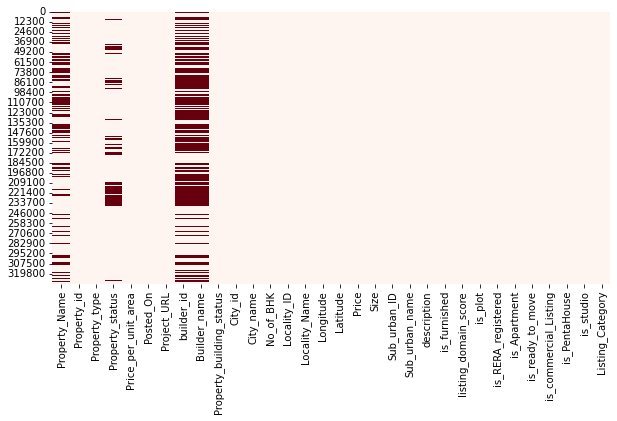

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap="Reds",cbar = False)
plt.show()
#https://matplotlib.org/stable/tutorials/colors/colormaps.html

<a id="Null_treatment"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> Null Values Treatment </b>
    </font>
</div>

In [10]:
# Dropping of Features.

df.drop(columns=['Builder_name','builder_id','Property_Name'],inplace=True)

In [11]:
# Replacing of Null values.

df.Property_status.replace(method='ffill',inplace=True)

In [12]:
# Dropping of Null Values.

df.dropna(subset=['Locality_Name','description'],inplace=True)

##### INFERENCE:
1.	The columns – `builder_id` , `builder_name` , `Property_name` has a `large` amount of null values. So it is better to `drop` those columns. <br><br>
2.	Column - `Property_status` has the status of the Property which is arranged in a way. So we’ll fill the null values with the `forward` values. <br><br>
3.	The columns – `Locality_name` & `description` has very less amount of the Null Values so and there is no relation between the forward and backward values in them. So we consider `dropping the rows`.


In [13]:
missingt = pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=['Count'])
missingt['Percentage'] = round(df.isnull().sum() / len(df) * 100,4)
missingt.loc[['Locality_Name','description','Property_status']]

,Count,Percentage
Locality_Name,0,0.0
description,0,0.0
Property_status,0,0.0


<a id="Nulls"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> Visualizing after Null Value Treatment </b>
    </font>
</div>

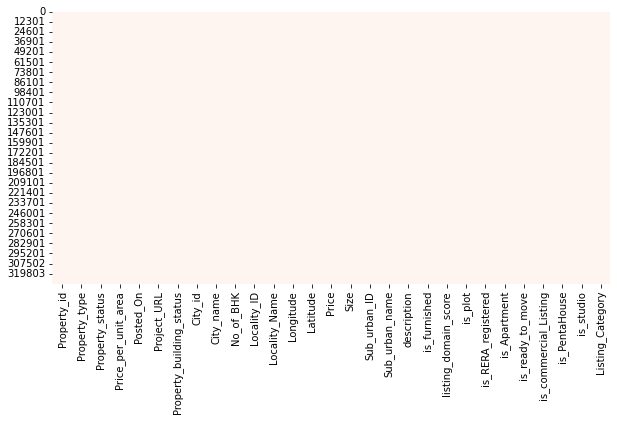

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap="Reds",vmin=0,vmax=1,cbar = False)
plt.show()

<a id="NumV"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> Data Cleaning for Numeric Variables </b>
    </font>
</div>

In [14]:
df['Price_per_unit_area']=df['Price_per_unit_area'].str.replace(',','').astype('int')

In [15]:
#Checking for the no. of rows where Price_per_unit_area is 0
len(df[df.Price_per_unit_area == 0])

1

As we can see `there is only 1 row where Price_per_unit_area is 0`. <br>
Dropping this row will not result in much information loss. So, we Consider dropping this row.

In [16]:
df.drop(index=df[df.Price_per_unit_area == 0].index,inplace=True)

In [17]:
df['Size']=df.Size.str[0:-6]
df['Size']=df.Size.str.replace(',','').astype('int')

In [18]:
df['Price']=df['Price'].str.replace(',','').astype('int')

In [19]:
df.drop(columns='Project_URL',inplace=True)

* Highlights called `Price_per_unit_area`,`Size` and `Cost` wrongly appointed `object` datatypes along these lines, right to `int` datatypes.

<a id="Duplicates"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> Check for Duplicate Values </b>
    </font>
</div>

In [20]:
df.duplicated().any()

False

* From above derivation, none of the elements contains `duplicates` values.

<a id="Sk"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> Check Skewness and Standard Deviation </b>
    </font>
</div>

In [21]:
dfnum = df[['Price_per_unit_area' , 'Price' , 'Size']]
dfcat = df.drop(columns=dfnum.columns)

In [22]:
Matrix = pd.DataFrame(dfnum.skew(), columns = ['Skewness'])
Matrix['Std.Deviation'] = dfnum.std()
Matrix.sort_values(by = 'Skewness', ascending = False, inplace = True)
Matrix

,Skewness,Std.Deviation
Size,335.914510,1.910359e+04
Price,11.404745,4.632398e+07
Price_per_unit_area,4.865035,1.090240e+04


In [23]:
# Auto-EDA
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [23]:
columns_for_graphs = ['Property_type' , 'Property_status' , 'Price_per_unit_area', 'Price', 'Size' , 'Property_building_status' , 'City_name' , 'No_of_BHK' , 'is_furnished' , 'is_plot', 'is_RERA_registered', 'is_Apartment', 'is_ready_to_move',
       'is_PentaHouse', 'is_studio',]

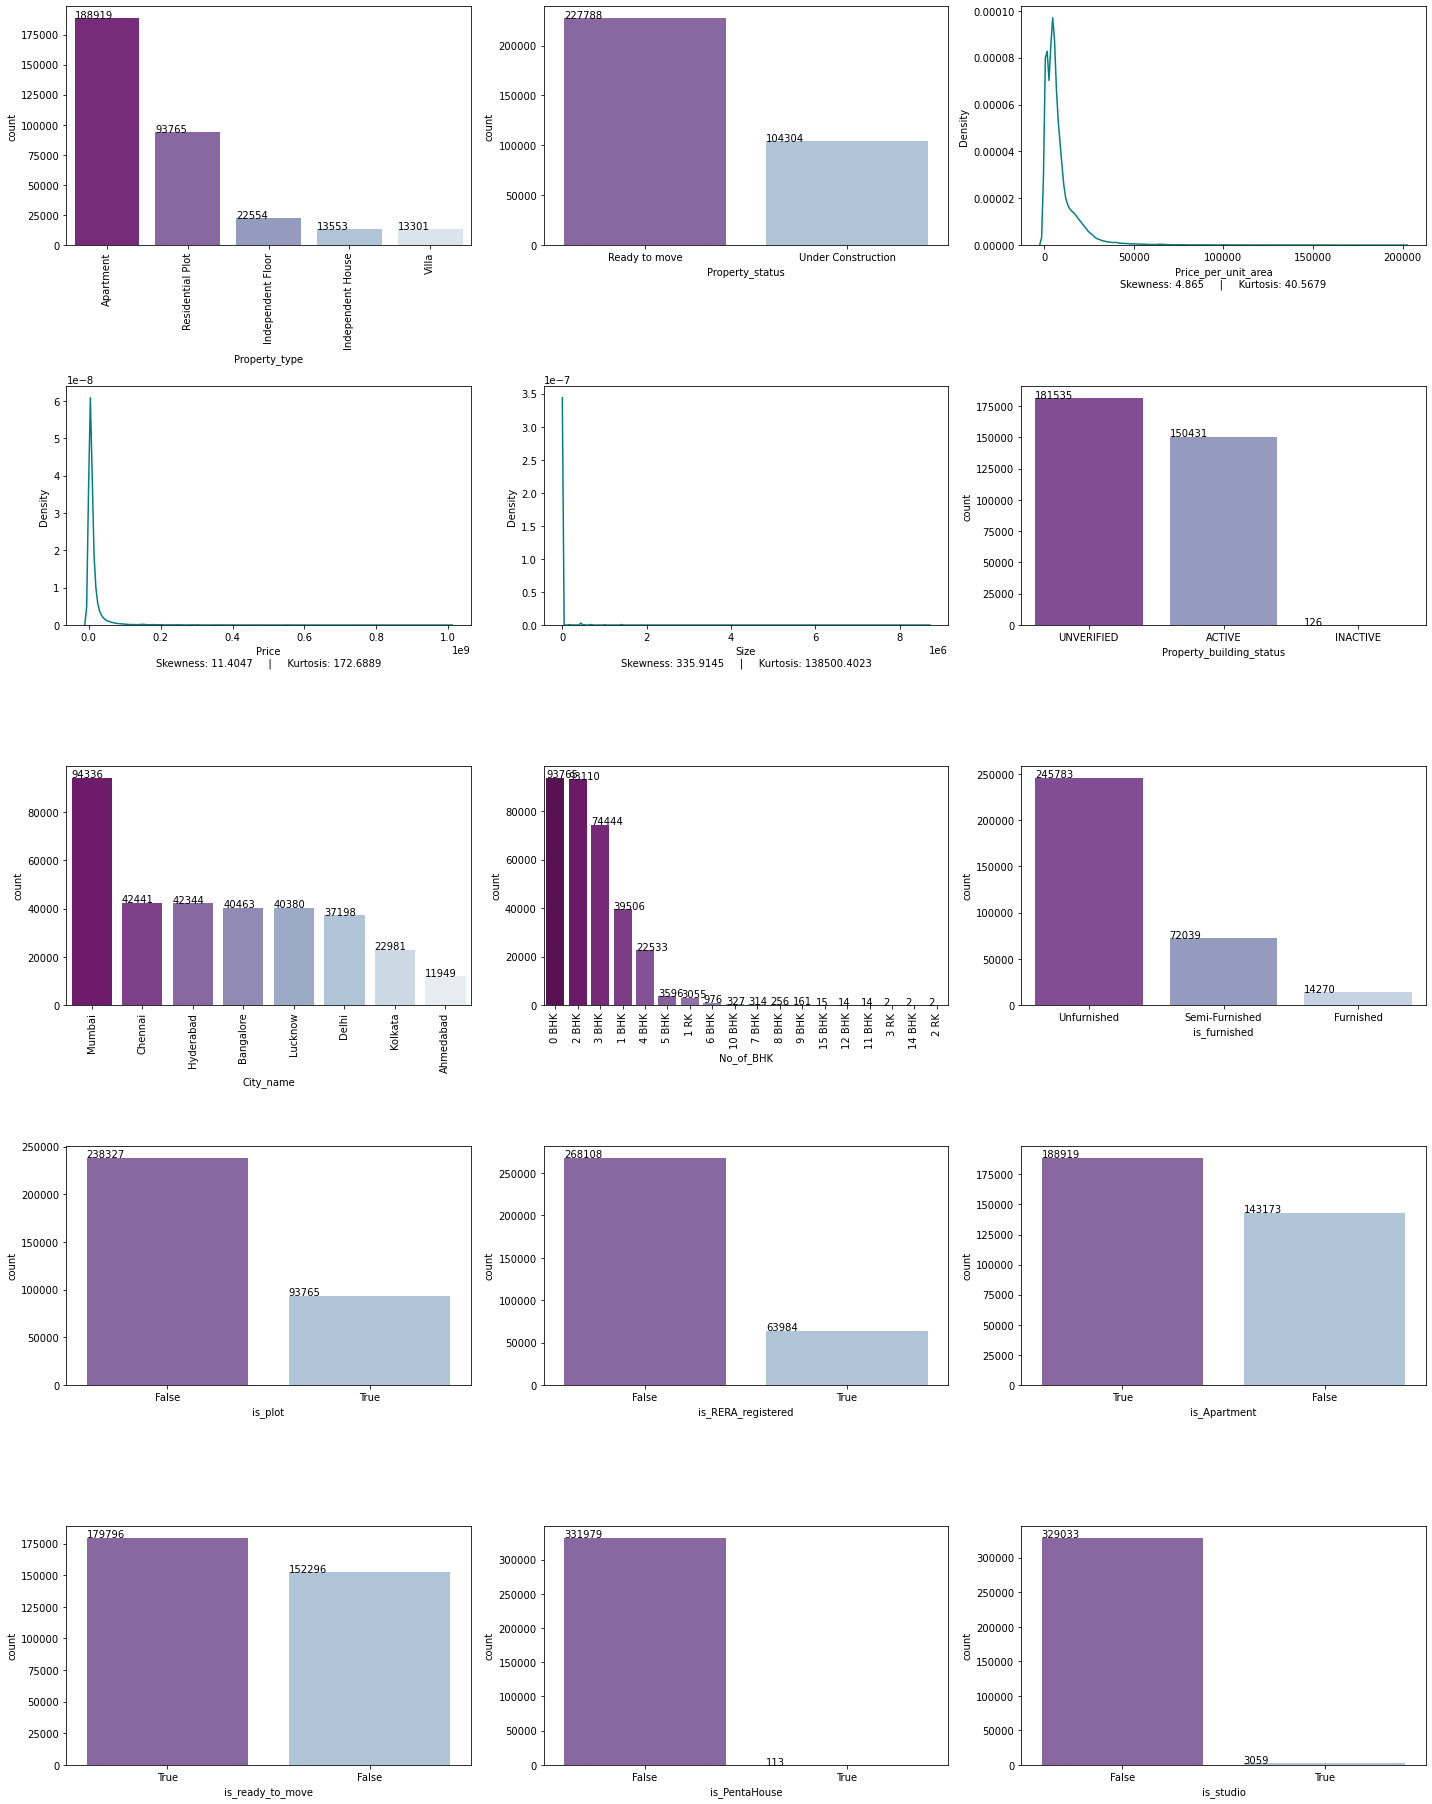

In [83]:
plt.figure(figsize=(20,30))
n=1
for i in columns_for_graphs:
    plt.subplot(6,3,n)
    if i in dfnum.columns:
        if df[i].skew() < 2 and df[i].skew() > -2 and df[i].kurt() < 7 and df[i].kurt() > -7:
            sns.kdeplot(df[i] ,color='red')
            plt.xlabel(f"{i}\nSkewness: {round(df[i].skew(),4)}     |     Kurtosis: {round(df[i].kurt(),4)}",fontsize=10)
        else:
            sns.kdeplot(df[i],color='teal')
            plt.xlabel(f"{i}\nSkewness: {round(df[i].skew(),4)}     |     Kurtosis: {round(df[i].kurt(),4)}",fontsize=10)
    else:
        ax = sns.countplot(df[i], order = df[i].value_counts().index , palette='BuPu_r')

        for p, label in zip(ax.patches, df[i].value_counts()):
            ax.annotate(label, (p.get_x(), p.get_height()+0.2))
        if len(df[i].value_counts()) >= 5:
            plt.xticks(rotation=90)
    plt.tight_layout()
    n+=1
plt.show()

* Skewness tells us the direction of outliers.

* Standard deviation measures the spread of the data, or dispersion of the data, or how clustered the data are around the mean, or how fairly the mean represents the data points.

<a id="NumS"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> Scatter Plot for Numeric Variables </b>
    </font>
</div>

**Inference:** Here by visualizing dist plot we can see that the **Features** plotted in `Teal color` are `positively skewed` and **Features** plotted in `red color` are `Negatively Skewed`.

**--:** *To reduce the impact of skewness we can use various transformation techiniques*

## `Box-cox` transformation

It is a generalized version of log transformation.
It makes the variable more symmetrical by reducing its skewness.

In [24]:
y=['Price_per_unit_area', 'Price', 'Size','listing_domain_score']

In [25]:
data_df = df.copy()

In [26]:
#applying box-cox tranformation
data1=[]
lamda=[]
for i in dfnum.columns:
    if any(data_df[i] <= 0):
        print('{}, Data must be positive i.e. 0.0'.format(i))
    else:
        fitted_data, fitted_lambda = stats.boxcox(data_df[i])
        print('for {},\tlambda(λ) value is {}'.format(i ,fitted_lambda))
        data1.append(fitted_data)
        lamda.append(fitted_lambda)

for Price_per_unit_area,	lambda(λ) value is 0.1246224150924115
for Price,	lambda(λ) value is -0.04811227992580454
for Size,	lambda(λ) value is -0.2316938917034293


In [27]:
#creating a new dataframe of transformed values
box_cox_trans = pd.DataFrame({'Price_per_unit_area':data1[0],'Price':data1[1],'Size':data1[2]})
box_cox_trans.reset_index(inplace=True,drop=True)

In [28]:
new = data_df.drop(columns=['Price','Size','Price_per_unit_area','listing_domain_score'])
new.reset_index(inplace=True,drop=True)
new_df = pd.concat([box_cox_trans,new],axis=1)

* `Price_per_unit_area`,`Price` and `Size` do not follow the bell curve, we can do `Box-Cox` transformation this data to make it  `normal` 
  as possible so that the statistical analysis results from this data become more valid. In other words, the log 
  transformation reduces or removes the skewness of our original data.

In [29]:
box_cox_trans.head(4)

,Price_per_unit_area,Price,Size
0,14.728115,11.080303,3.550983
1,16.163164,11.602685,3.659383
2,15.578454,11.340721,3.597563
3,13.235572,10.508768,3.427631


**Here we have applied box cox transformation on dataset and we have calculated lamda values for each features,
for some features you can see there is an error `Data must be positive`, it is because box-cox transformation is extremely sensitive to negative data or 0.**

<a id="Outliers"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> Checking for the Outliers (Boxplot) </b>
    </font>
</div>

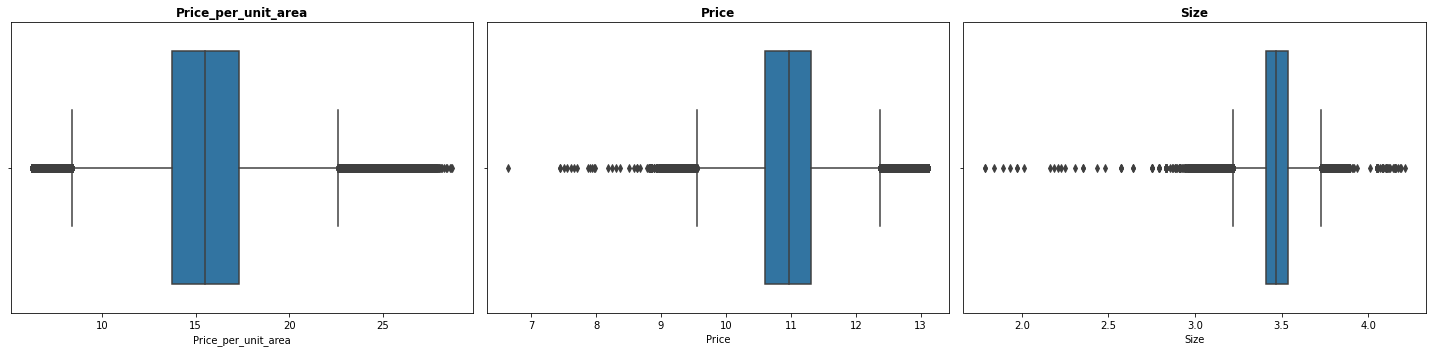

In [116]:
n=1
plt.figure(figsize=(20,5))
for i in dfnum.columns:
    plt.subplot(1,3,n)
    n+=1
    sns.boxplot(new_df[i])
    plt.title(i,weight='bold')
    plt.tight_layout()
plt.show()

In [30]:
from scipy.stats import trim_mean

In [31]:
print('Difference between mean and trim_mean with proportion cut = 0.1 of')
n = 1
for i in dfnum.columns:
    if len(i) > 10:
        print(n , i,"\t:",df[i].mean() - trim_mean(df[i],0.1))
    else:
        print(n , i," \t\t:",df[i].mean() - trim_mean(df[i],0.1))
    n += 1

Difference between mean and trim_mean with proportion cut = 0.1 of
1 Price_per_unit_area 	: 1977.5364831664347
2 Price  		: 7561604.653871433
3 Size  		: 340.22492767719314


📝**Inference:** By Visualizing above boxplot we can see that all the Features have potential outliers and i some features there are extreme values as well.

**Outliers:** Outliers is an observation which deviates so much from the other observations, that it become suspicious that it was generated by different mechanism or simply by error

**Extreme Values:** Extreme Values is an observation with value at the boundaries of the domain
    
**Reason for outliers exist in the data:**
1. Variability in the Data
2. An experimental measurment error

**Impact of outliers on Dataset:**
1. it causes various problem during statstical analysis
2. It effects the mean and standard deviation


###### * From above visualization, treatment of `outliers` for above features is required.

In [32]:
mdf=new_df.copy()

<a id="OutTreat"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> Outlier Treatment (Capping) </b>
    </font>
</div>

In [33]:
# Capping of Outliers
col=[ 'Price_per_unit_area', 'Price', 'Size']
for i in col:
    ll,q1,q3,ul=new_df[i].quantile([0.01,0.25,0.75,0.95])
    LL=q1-1.5*(q3-q1)
    UL=q3+1.5*(q3-q1)
    new_df[i]=new_df[i].apply(lambda x: ll if x<LL else ul if x>UL else x)

* To recap, IQR is Q3-Q1, and the upper limit for non-outliers is `Q3+1.5*IQR`, the lower limit for non-outliers is `Q1-1.5*IQR`. 

<a id="OutViz"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> Outliers Visualization (After Treatment) </b>
    </font>
</div>

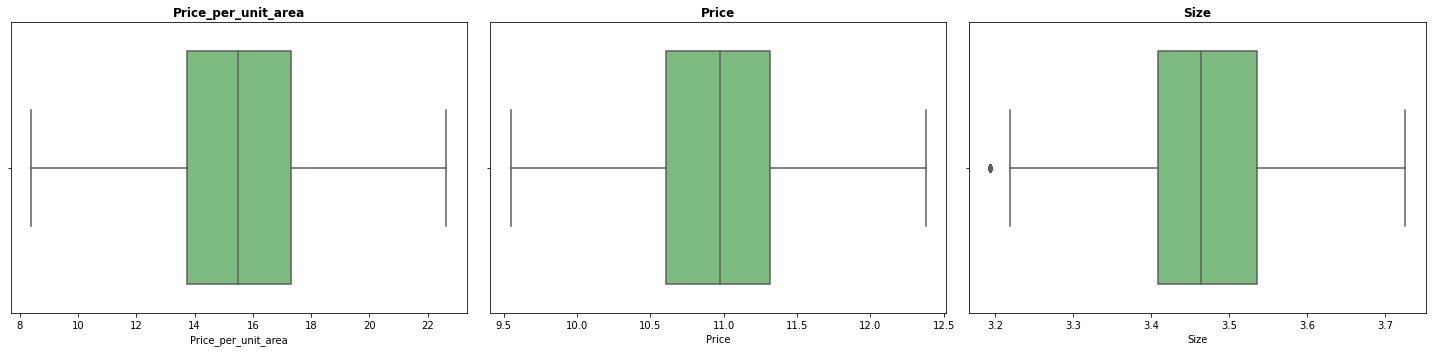

In [34]:
n=1
plt.figure(figsize=(20,5))
for i in dfnum.columns :
    if new_df[i].dtypes!='object' and new_df[i].dtypes!='bool':
        plt.subplot(1,3,n)
        n+=1
        sns.boxplot(new_df[i],palette='Greens')
        plt.title(i,weight='bold')
        plt.tight_layout()

<a id="VizOutBA"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> Visualization Before & After Outlier Treatment </b>
    </font>
</div>

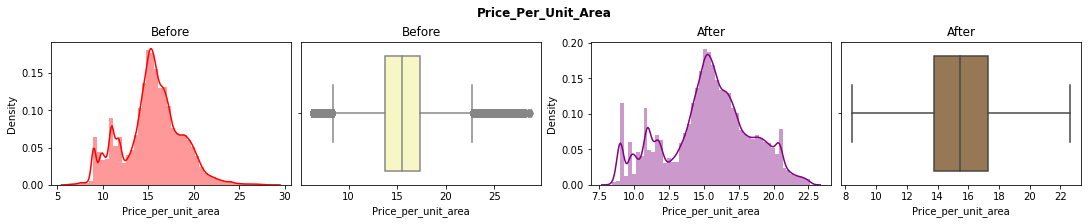

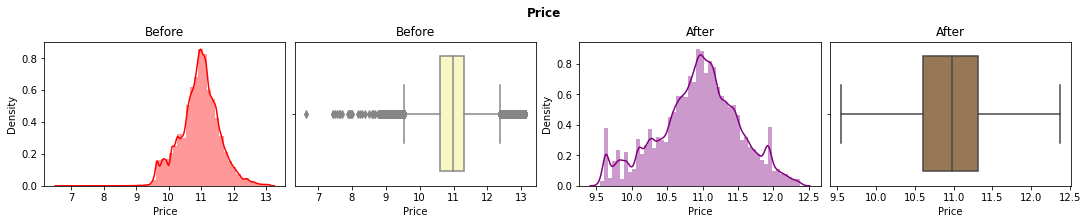

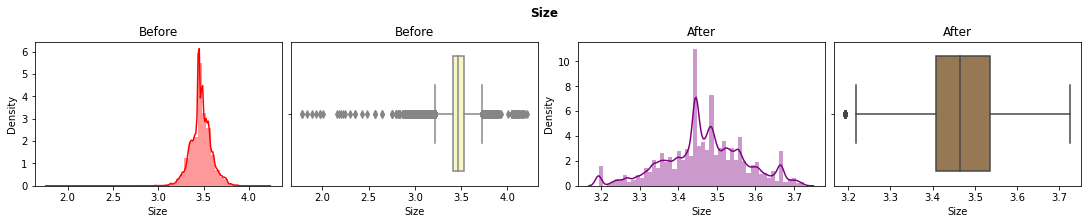

In [130]:
#Plotting Graphs Before & After treating outliers
for col in dfnum.columns:
    fig, ax =plt.subplots(1,4, constrained_layout=True)
    fig.set_size_inches(15, 3)
    # Before treating outliers
    sns.distplot(mdf[col], ax=ax[0],color='r').set(title="Before")
    sns.boxplot(mdf[col], ax=ax[1],palette='Spectral').set(title="Before")
    # After treating outliers
    sns.distplot(new_df[col], ax=ax[2],color='purple').set(title="After")
    sns.boxplot(new_df[col], ax=ax[3],palette='cubehelix').set(title="After")
    plt.suptitle(f'{col.title()}',weight='bold')
    fig.show()

<a id="UniV"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> Feature Engineering </b>
    </font>
</div>

In [35]:
# Convert into bins.
new_df['No_of_BHK'].replace(['5 BHK','6 BHK','10 BHK','7 BHK','8 BHK','9 BHK','15 BHK','12 BHK','11 BHK','14 BHK'],'>4 BHK',inplace=True)
new_df['No_of_BHK'].replace(['1 RK' , '2 RK' , '3 RK'] , 'RKs',inplace=True)

In [36]:
new_df['No_of_BHK'].value_counts()

0 BHK     93765
2 BHK     93110
3 BHK     74444
1 BHK     39506
4 BHK     22533
>4 BHK     5675
RKs        3059
Name: No_of_BHK, dtype: int64

In [37]:
# Convert into bins.
li = []
for i in new_df.Posted_On:
    if 'day' in i:
        li.append('Days')
    elif 'month' in i:
        li.append('Months')
    elif 'minute' in i:
        li.append('Minutes')
    elif 'hour' in i:
        li.append('Hours')
    elif 'year' in i:
        li.append('Years')
new_df['Posted_on'] = li

In [38]:
# Dropping of feature
new_df.drop(columns=['Posted_On'],inplace=True)

* Highlights called `No_of_BHK` and `Posted_on` are in sure structure so we convert it into containers for better comprehension.

<a id="UniV"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> Univariate Analysis </b>
    </font>
</div>

<a id="Count"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> Count Plots for Categorical Variables </b>
    </font>
</div>

In [39]:
col=['City_name','No_of_BHK','is_furnished','Listing_Category','is_studio','Property_type','is_RERA_registered',
     'is_Apartment','is_ready_to_move','is_plot','Posted_on']
r = int(len(col)/3 +1)

In [40]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

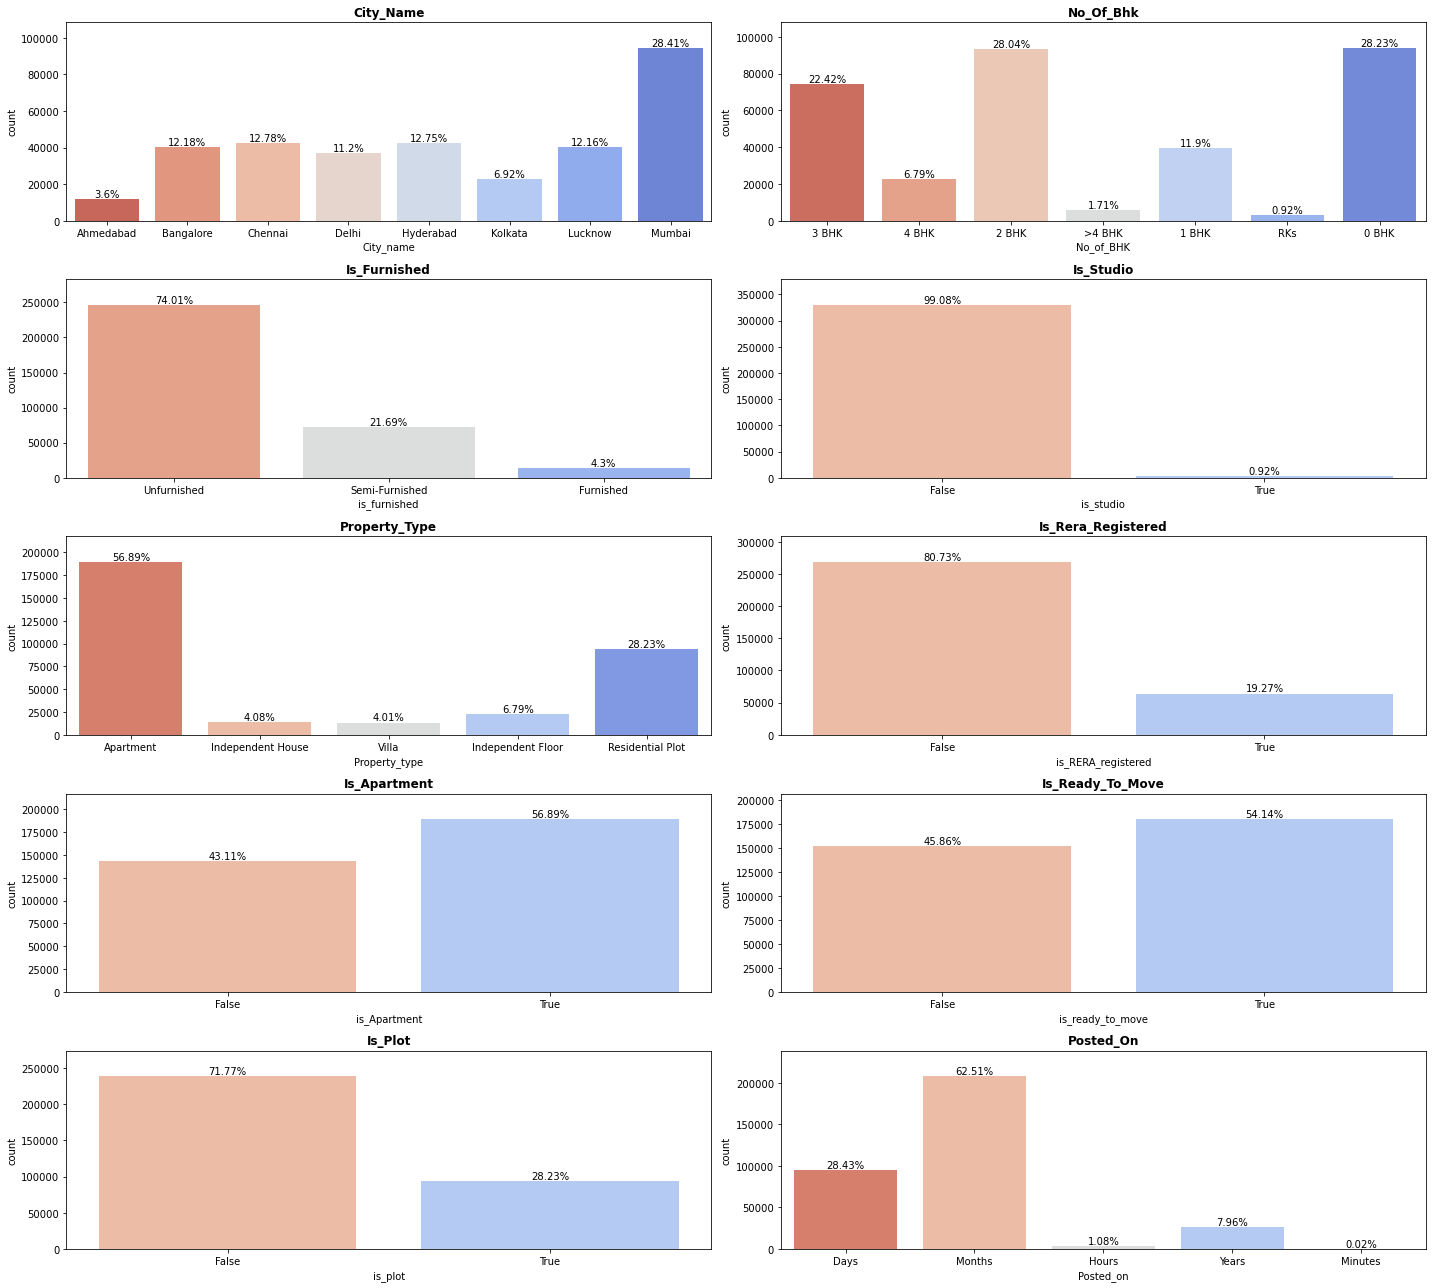

In [46]:
# Plotting the countplots for each categorical variable
col=['City_name','No_of_BHK','is_furnished','is_studio','Property_type','is_RERA_registered','is_Apartment','is_ready_to_move','is_plot','Posted_on']
plt.figure(figsize=(20,18))
for n,column in enumerate(col):
    plot = plt.subplot(5,2,n+1)
    sns.countplot(new_df[column],palette='coolwarm_r').margins(y=0.15)
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

<b> Observations: </b>
1. Around 28% of houses sell in Mumbai follows by Chennai and Hyderabad.<br>
2. Inclination for Houses like 2 BHK or 0 BHK are around 60%.<br>
3. Almost, 74% of houses sell are is unfurnished.<br>
4. All posting houses are sell.<br>
5. Practically 99%,a independent space houses sell everything in a solitary room with a different restroom.<br>
6. For the most part, People favor Apartment and Residential Plot.<br>
7. Around, 80% of houses sell, are not milestone regulations passed by the Government of India.<br>
8. Kinds of houses for the most part sell are loft, around 57%.<br>
9. 55% of individuals are prepared to move to new house.<br>
10. Individuals are liking to purchase plot rather than different choices.<br>

`Listing_Category` has no class imbalance as it has only 1 value in it i.e., `sell`. So we consider dropping the Column.

In [ ]:
new_df.drop(columns='Listing_Category',inplace = True)

<a id="Kdes"></a>
<div align='left'>
    <font color='teal' , size = 3px>
        <b> Kde Plots for Numerical Variables </b>
    </font>
</div>

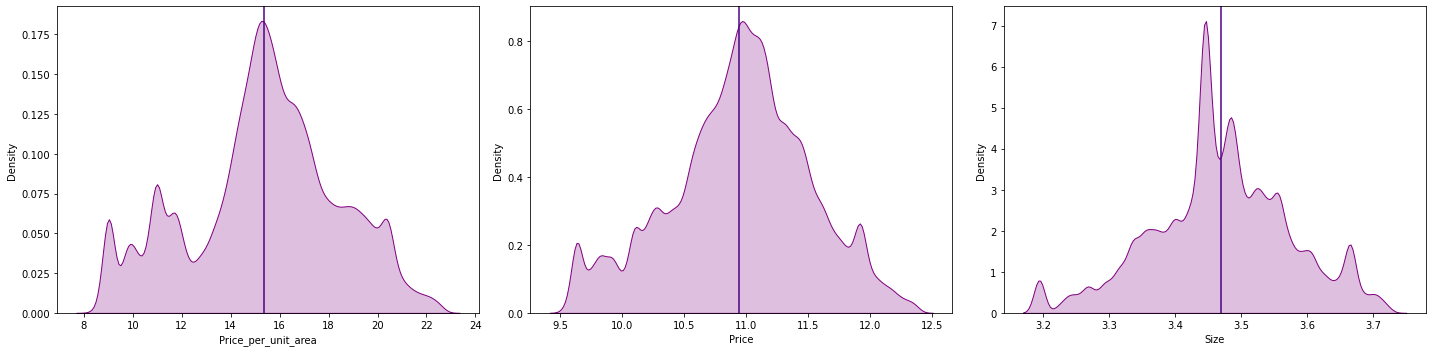

In [135]:
plt.figure(figsize=(20,5))
n = 1
for i in dfnum.columns:
    plt.subplot(1,3,n)
    sns.kdeplot(new_df[i],fill=True, color = 'purple')
    plt.axvline(new_df[i].mean(),color='indigo')
    n+=1
plt.tight_layout()
plt.show()

## `Bivariate` or `Multivariate` Analysis

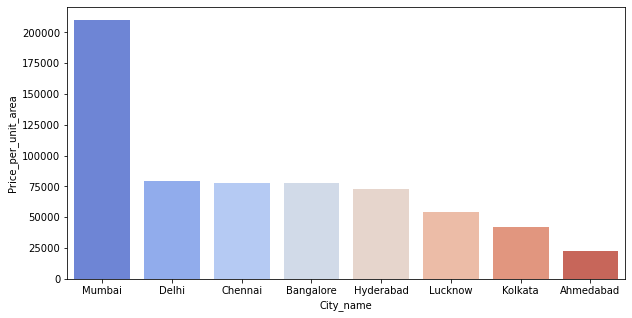

In [136]:
aaa = new_df.groupby('City_name').sum()['Price_per_unit_area'] / new_df.City_name.nunique() 
plt.figure(figsize=(10,5))
sns.barplot(x=aaa.sort_values(ascending=False).index , y=aaa.sort_values(ascending=False) , palette='coolwarm')
plt.show()

* Mumbai city has more `Cost per unit region` trailed by different urban areas like Delhi, Bangalore and Chennai.

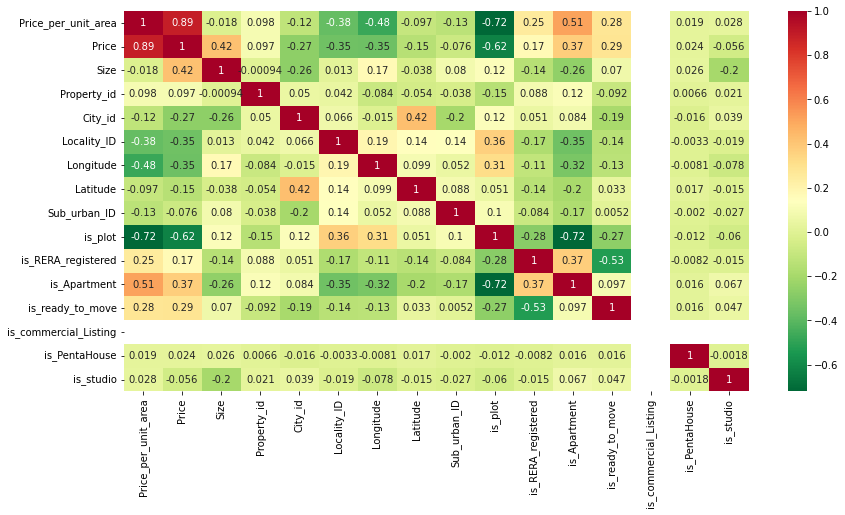

In [137]:
plt.figure(figsize=(14,7))
sns.heatmap(new_df.corr(),annot=True,cmap="RdYlGn_r")
plt.show()

* Assuming using `new_df.corr()`, the results from a heatmap are `Pearson correlation` coefficients which can be thought of as `the explainability between two arrays`.


* An effect score closer to 0 translates to there being `No` relationship. A score closer to 1 or -1 is a `Positive` or `Negative` relationship. A perfect score of 1 is a `Direct` correlation.

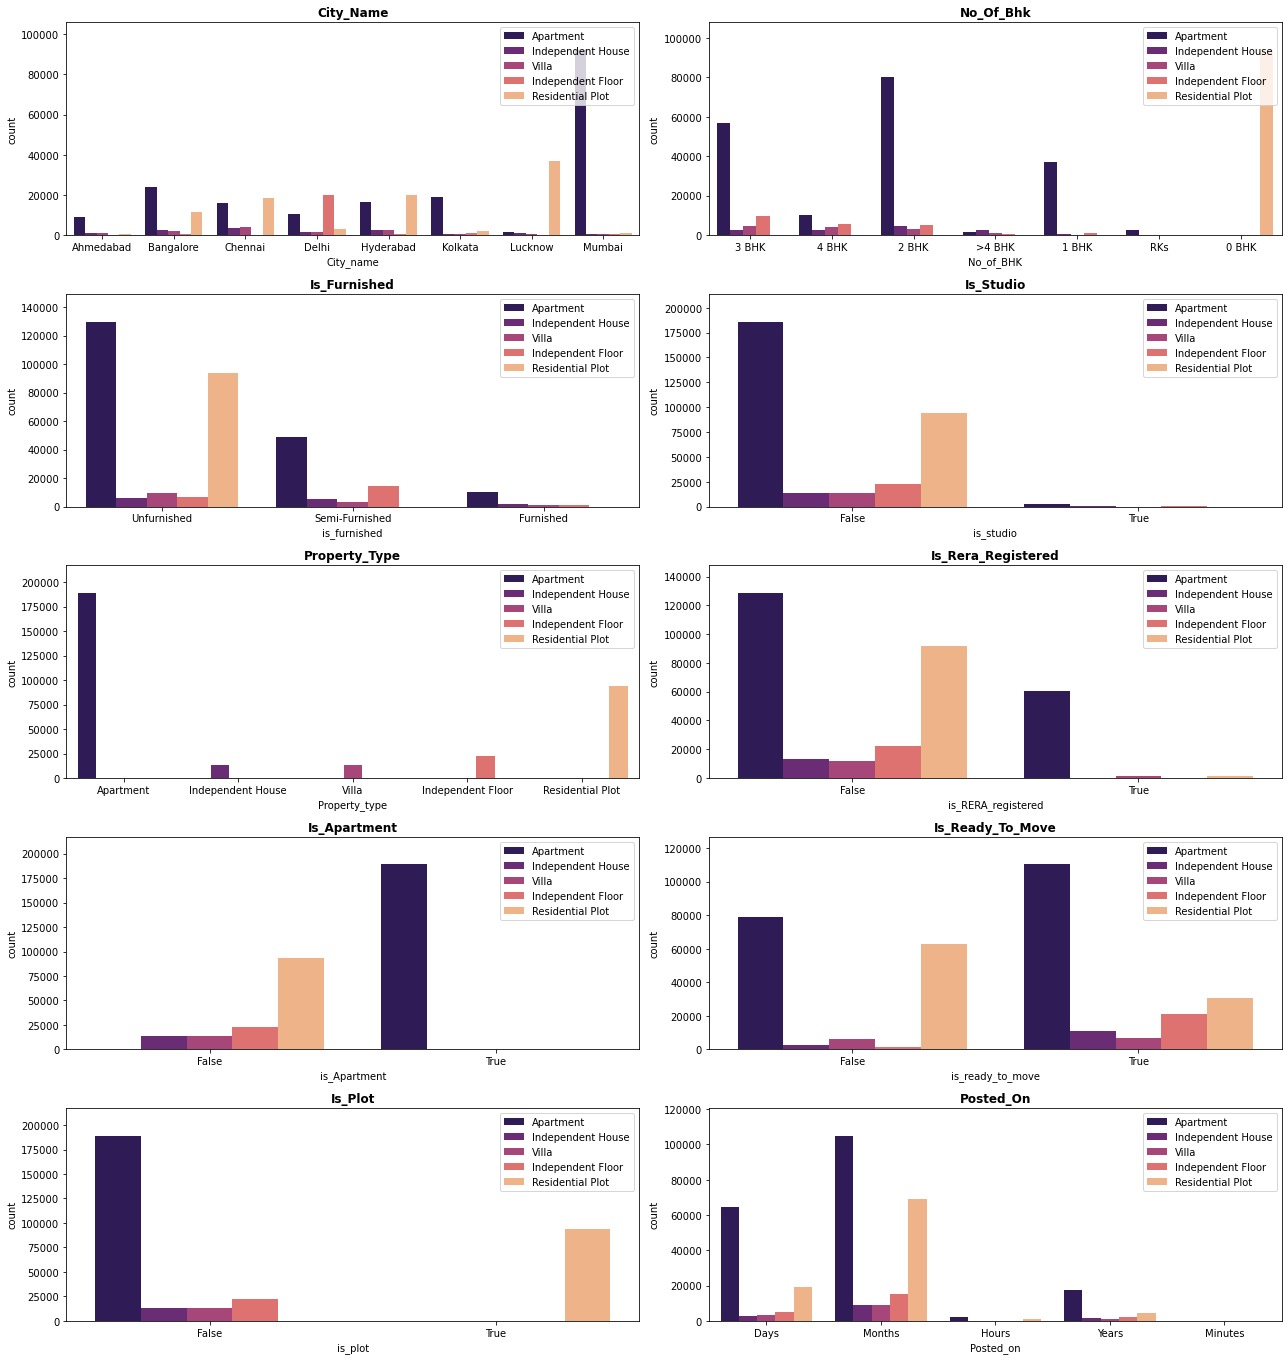

In [48]:
# Plotting the countplots for each categorical variable

plt.figure(figsize=(18,19))
for n,column in enumerate(col):
    plot = plt.subplot(5,2,n+1)
    sns.countplot(new_df[column],hue=new_df['Property_type'],palette='magma').margins(y=0.15)
    plt.title(f'{column.title()}',weight='bold')
    plt.legend(loc='upper right')
    plt.tight_layout()
    

<b> Observations : </b>
1. Selling of `Apartment` are exceptionally high in each city, follows by `Private plot`.<br>
2. Individuals liked to purchase `Plot` rather than some other 'property type'.<br>
3. The vast majority of `Apartment` are not outfitted.<br>
4. For the sell,most of `Listing Category` are apartment,followed by `Private plot`.<br>
5. Basically the greater part of `Apartment`,a free space houses sell everything in a singular room with an alternate bathroom.<br>
6. The vast majority of `Property_type` are not `RERA Registered`.<br>
7. 70% of people,'ready to move' in various `Property_type`.<br>

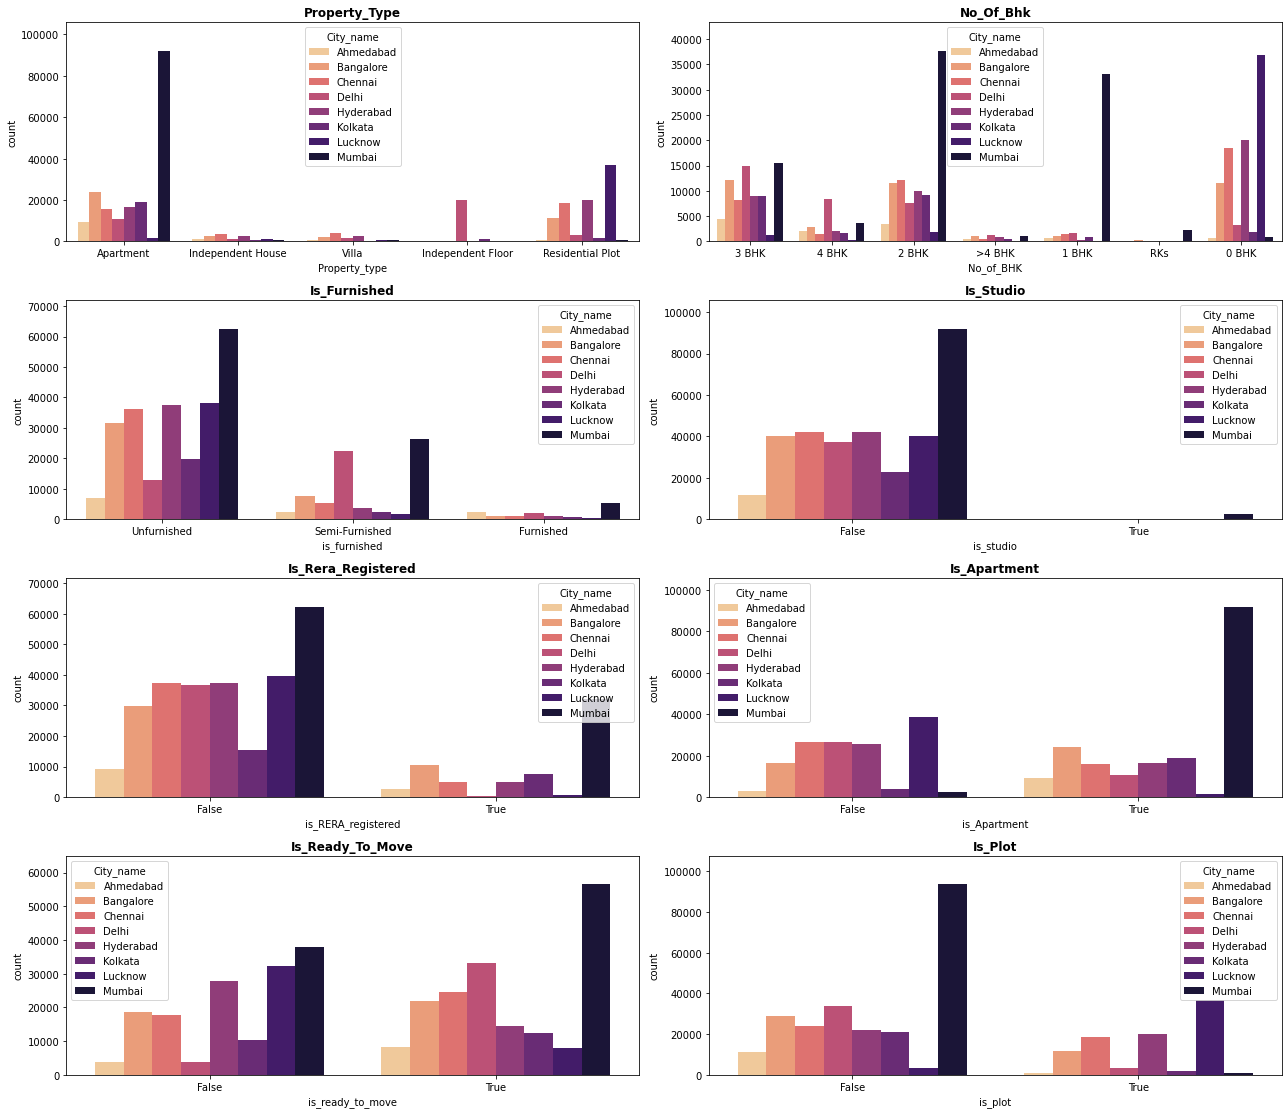

In [50]:
# Visualize
plt.figure(figsize=(18,19))
for n,column in enumerate(col):
    plot = plt.subplot(5,2,n+1)
    sns.countplot(new_df[column],hue=new_df['City_name'],palette='magma_r').margins(y=0.15)
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

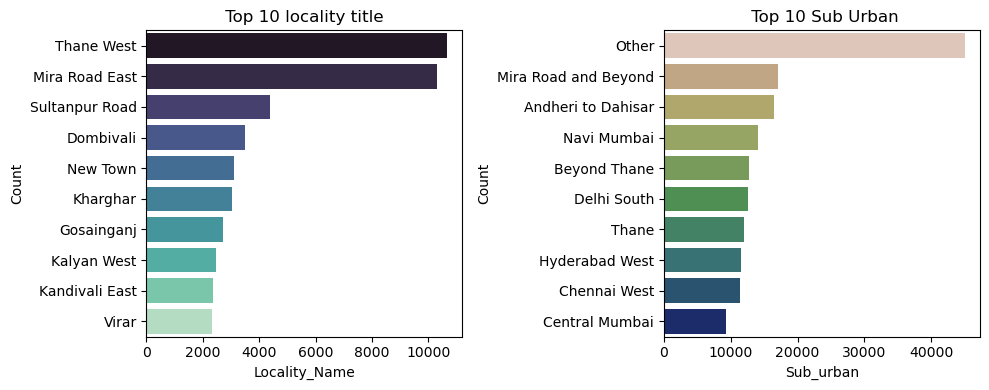

In [145]:
#plotting barplot
plt.figure(figsize=(10,4),dpi=100)
plt.subplot(1,2,1)
sns.barplot(y=new_df['Locality_Name'].value_counts().head(10).index ,x=new_df['Locality_Name'].value_counts().head(10).values , palette='mako')
plt.xlabel('Locality_Name')
plt.ylabel('Count')
plt.title(" Top 10 locality title ")#,weight='bold')
plt.subplot(1,2,2)
sns.barplot(y=new_df['Sub_urban_name'].value_counts().head(10).index ,x=new_df['Sub_urban_name'].value_counts().head(10).values,palette='gist_earth_r')
plt.xlabel('Sub_urban')
plt.ylabel('Count')
plt.title(" Top 10 Sub Urban")#,weight='bold')
plt.tight_layout()

#### * Observations :

1. Generally Number of houses are from territory `Thane West` and `Mira Road`.


2. The vast majority of `Sub Urban` spots are others or `Mira street`.

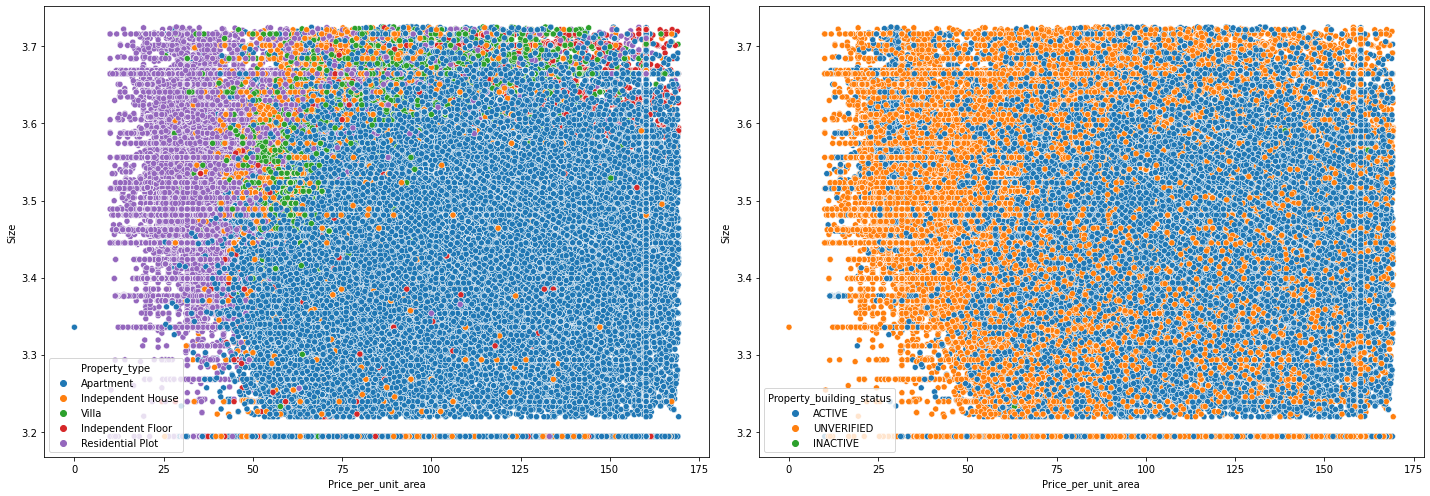

In [161]:
# Plotting the scatter-plots for each categorical variable
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.scatterplot(x=new_df['Price_per_unit_area'],y=new_df['Size'],hue=new_df['Property_type'])
plt.subplot(1,2,2)
sns.scatterplot(x=new_df['Price_per_unit_area'],y=new_df['Size'],hue=new_df['Property_building_status'])
plt.tight_layout()
plt.show()

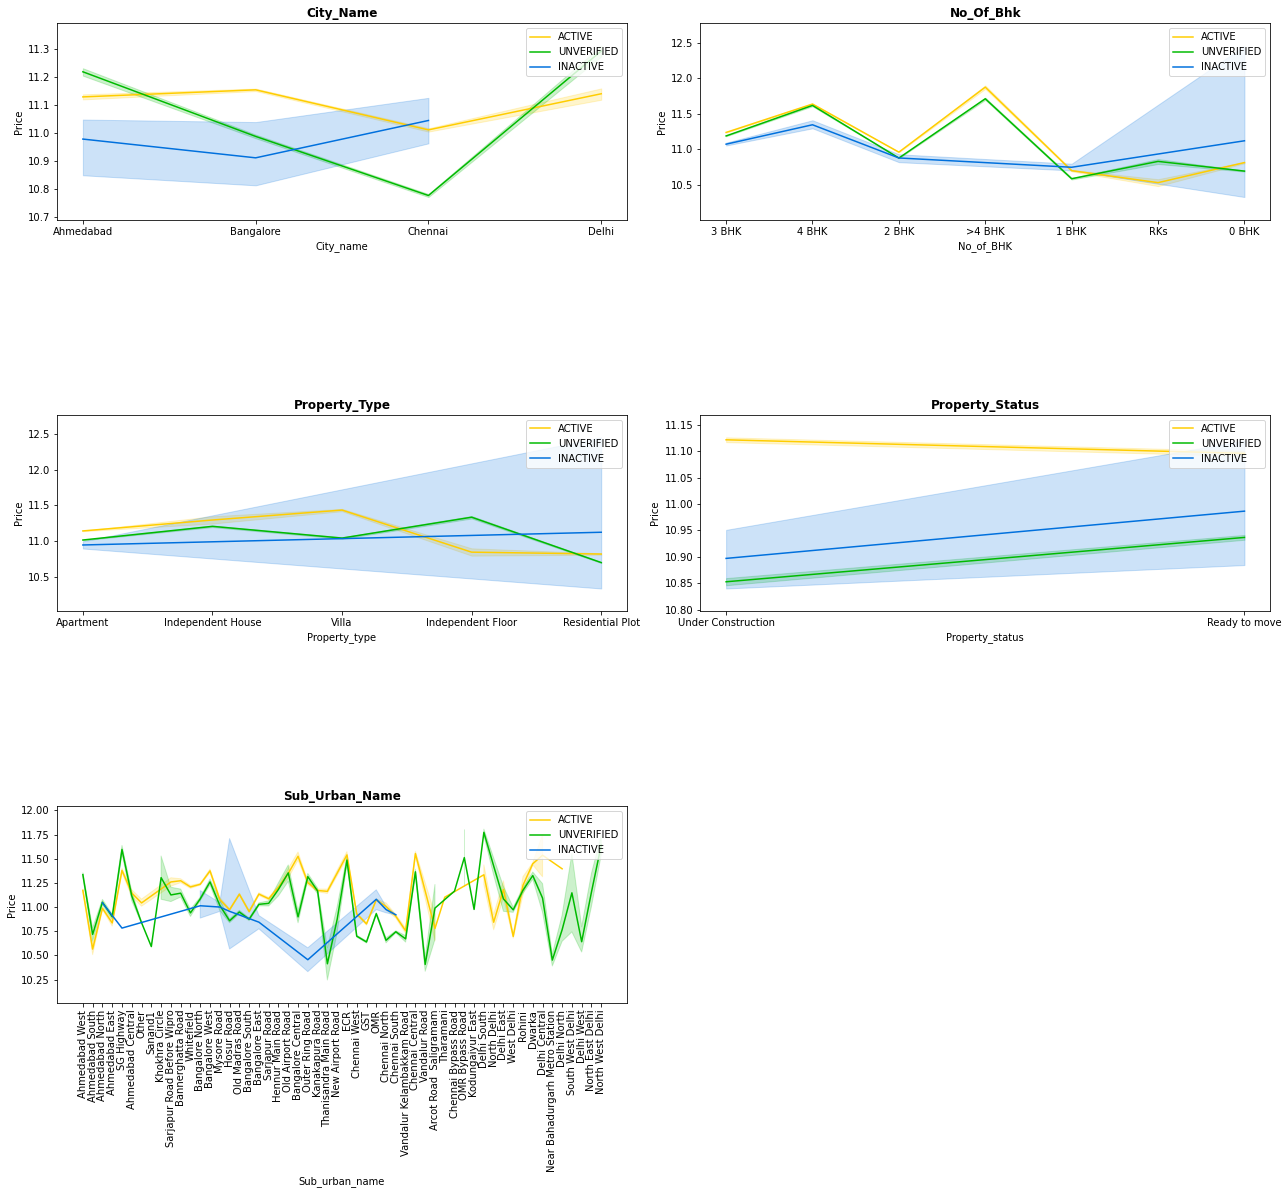

In [52]:
# Visualize
new_df.head(3)
col=['City_name','No_of_BHK','Property_type','Property_status','Sub_urban_name']
plt.figure(figsize=(18,25))
for n,column in enumerate(col):
    plot = plt.subplot(5,2,n+1)
    sns.lineplot(x=new_df[column].head(100000),y=new_df['Price'].head(100000),hue=new_df['Property_building_status'].head(100000),palette='nipy_spectral_r').margins(y=0.15)
    plt.title(f'{column.title()}',weight='bold')
    if column == 'Sub_urban_name':
        plt.xticks(rotation=90)
    plt.legend(loc='upper right')
    plt.tight_layout()

### Statistics Test.

In [39]:
from scipy import stats

In [40]:
#Dropping unnecessary columns from data.
df.drop(columns=['description'],inplace=True)

In [41]:
col1=['Property_status', 'Property_building_status','City_name', 'No_of_BHK', 
      'Locality_Name', 'Sub_urban_name','is_furnished','Listing_Category','Posted_on']

## `Chi-Square` Test for Independence

This test is used to test whether the categorical variables are independent or not.

<p style='text-indent:20em'> <strong> $H_{0}$: The variables are independent</strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The variables are not independent (i.e. variables are dependent)</strong></p>

In [42]:
# Chic-contingency test.
for i in col1:
    observed=pd.crosstab(new_df[i],new_df['Property_type'])
    chi_stat,p_value,ddof,expected_val=stats.chi2_contingency(observed,correction=False)
    alpha=0.05
    if p_value<alpha:
        print('')
        print('* {} and Property_type both are not independent i.e Target relies upon that Feature.'.format(i))
        print('- Chic_stats:',chi_stat)
        print('> P-Value:',p_value)
        print('$ Degree of freedom:',ddof)
    else:
        print('')
        print('* {} and Property_type both are independent i.e Target not relies upon that Feature.'.format(i))
        print('- Chic_stats:',chi_stat)
        print('> P-Value:',p_value)
        print('$ Degree of freedom:',ddof)


* Property_status and Property_type both are not independent i.e Target relies upon that Feature.
- Chic_stats: 28582.450525696404
> P-Value: 0.0
$ Degree of freedom: 4

* Property_building_status and Property_type both are not independent i.e Target relies upon that Feature.
- Chic_stats: 104501.93840973516
> P-Value: 0.0
$ Degree of freedom: 8

* City_name and Property_type both are not independent i.e Target relies upon that Feature.
- Chic_stats: 316862.3035382005
> P-Value: 0.0
$ Degree of freedom: 28

* No_of_BHK and Property_type both are not independent i.e Target relies upon that Feature.
- Chic_stats: 395894.96543174126
> P-Value: 0.0
$ Degree of freedom: 24

* Locality_Name and Property_type both are not independent i.e Target relies upon that Feature.
- Chic_stats: 592653.9660530642
> P-Value: 0.0
$ Degree of freedom: 20180

* Sub_urban_name and Property_type both are not independent i.e Target relies upon that Feature.
- Chic_stats: 357832.28702466656
> P-Value: 0.0
$ Deg

📝**Inference:**

* Null Hypothesis (H0)- Both are Independent.
* Alternate Hypothesis (H1)- Both are not Independent.


* if p_value < `0.05`, `Reject` Null Hypothesis (H0)
* if p_value > `0.05`, `Fail to reject` Null Hypothesis (H1)


* Along these lines, From above measurable test,we get to know that `Property_type` isn't relies upon `Listing_category`,others all absolute highlights are reliant.

In [43]:
# Numerical columns for t-independent Test.
t_col=new_df.select_dtypes(np.number).iloc[:,[0,1,2]].columns

In [44]:
for i in t_col:
    alpha=0.05
    stats1,p1_value=stats.jarque_bera(df[i])
    stats2,p2_value=stats.jarque_bera(df['Price'])
    if p1_value<0.05 and p2_value< 0.05:
        print('Jarque-bera test shows P-Value is less than 0.05 for {} and Price.:'.format(i))
        print('Mannwhitneyu Test:')
        t_stats,p_value=stats.mannwhitneyu(x=df[i],y=df['Price'])
        if p_value<alpha:
            print('* The difference between the {} and Price means are not statistically significant.Both are Independent'.format(i))
            print('- T_stats:',t_stats)
            print('> P-Value:',p_value)
            print('')
        else:
            print('* The difference between the {} and Price means are statistically significant.Both are Dependent'.format(i))
            print('- T_stats:',t_stats)
            print('> P-Value:',p_value)
            print('')
        
    else:
        print('Jarque-bera test shows P-Value is greater than 0.05 for {} and Price.'.format(i))
        print('T_Independent:')
        t_stats,p_value=stats.ttest_ind(a=df[i],b=df['Price'])
        if p_value<alpha:
            print('* The difference between the {} and Price are not statistically significant.Both are Independent'.format(i))
            print('- T_stats:',t_stats)
            print('> P-Value:',p_value)
        else:
            print('* The difference between the {} and Price means are statistically significant.Both are Dependent'.format(i))
            print('- T_stats:',t_stats)
            print('> P-Value:',p_value)

Jarque-bera test shows P-Value is less than 0.05 for Price_per_unit_area and Price.:
Mannwhitneyu Test:
* The difference between the Price_per_unit_area and Price means are not statistically significant.Both are Independent
- T_stats: 948702.0
> P-Value: 0.0

Jarque-bera test shows P-Value is less than 0.05 for Price and Price.:
Mannwhitneyu Test:
* The difference between the Price and Price means are statistically significant.Both are Dependent
- T_stats: 55142548232.0
> P-Value: 1.0

Jarque-bera test shows P-Value is less than 0.05 for Size and Price.:
Mannwhitneyu Test:
* The difference between the Size and Price means are not statistically significant.Both are Independent
- T_stats: 883056.0
> P-Value: 0.0



###### The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of difference in location between distributions.

The two sample t-test is used to compare the means of two independent populations. This test assumes that the populations are normally distributed from which the samples are taken.

The null and alternative hypothesis is given as:
<p style='text-indent:25em'> <strong> $H_{0}: \mu_{1} - \mu_{2} = \mu_{0}$ or $\mu_{1} - \mu_{2} \geq \mu_{0}$ or $\mu_{1} -\mu_{2} \leq \mu_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: \mu_{1} - \mu_{2} \neq \mu_{0} $ or $\mu_{1} - \mu_{2} < \mu_{0}$ or $\mu_{1} -\mu_{2} > \mu_{0}$</strong></p>

In [45]:
# importing the kruskal function from the scipy.stats library 
from scipy.stats import kruskal

In [46]:
df_num=new_df.select_dtypes(np.number).iloc[:,[0,1,2]].columns

In [47]:
for i in dfnum:
    
    print(f'For {i}, the null and alternative hypothesis are:')
    print('\tH0: The variables {} and Property Status are independent'.format(i))
    print('\tH1: The variables {} and Property Status are not independent'.format(i))
    print('')
    
    Charged_Off_set=df[df['Property_status']=='Ready to move'][i]
    Fully_Paid_set=df[df['Property_status']=='Under Construction'][i]
    
    # use the 'kruskal()' to check the independence of variables
    # the function returns the test statistic value, corresponding p-value
    # pass the separated values of each numerical columns according to the target variable which
    test_stat, p = kruskal(Charged_Off_set,Fully_Paid_set)

    print("Test statistic:", test_stat)
    print("p-value:", p)
   
    
    if p > 0.05:
        print('The above output shows that the H-test p-value is greater than 0.05, thus we fail to reject the null hypothesis\nand conclude that the variables {} and Property status are independent.'.format(i))
        print('\n\n')
    else:
        print('The above output shows that the H-test p-value is lesser than 0.05, thus we reject the null hypothesis\nand conclude that the variables {} and Property status are dependent.'.format(i))
        print('\n\n')

For Price_per_unit_area, the null and alternative hypothesis are:
	H0: The variables Price_per_unit_area and Property Status are independent
	H1: The variables Price_per_unit_area and Property Status are not independent

Test statistic: 4613.2042591473555
p-value: 0.0
The above output shows that the H-test p-value is lesser than 0.05, thus we reject the null hypothesis
and conclude that the variables Price_per_unit_area and Property status are dependent.



For Price, the null and alternative hypothesis are:
	H0: The variables Price and Property Status are independent
	H1: The variables Price and Property Status are not independent

Test statistic: 2456.867592837144
p-value: 0.0
The above output shows that the H-test p-value is lesser than 0.05, thus we reject the null hypothesis
and conclude that the variables Price and Property status are dependent.



For Size, the null and alternative hypothesis are:
	H0: The variables Size and Property Status are independent
	H1: The variables Siz

## `Post-hoc` Analysis

If one-way ANOVA rejects the null hypothesis; we conclude that at least one treatment has a different mean. The test does not distinguish a treatment with the different average value. The post-hoc test or `multi comparison test` is used to identify such treatment(s).

In this section, we study the `Tukey's HSD` test. The test calculates the mean difference for each pair of treatments and returns the pair(s) with different average.

In [48]:
col=['Property_type','Property_status','is_RERA_registered', 'is_Apartment', 'is_ready_to_move', 'is_PentaHouse', 'is_studio','Posted_on']

In [49]:
for i in col:
    comp = mc.MultiComparison(groups=new_df[i], data = new_df['Price'])
    post_hoc = comp.tukeyhsd()
    print('')
    print(i)
    print(post_hoc.summary())


Property_type
           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
        Apartment Independent Floor   0.2189    0.0  0.2105  0.2274   True
        Apartment Independent House   0.0889    0.0  0.0782  0.0997   True
        Apartment  Residential Plot  -0.7492    0.0  -0.754 -0.7444   True
        Apartment             Villa   0.1989    0.0  0.1881  0.2097   True
Independent Floor Independent House    -0.13    0.0 -0.1431 -0.1169   True
Independent Floor  Residential Plot  -0.9682    0.0 -0.9771 -0.9592   True
Independent Floor             Villa    -0.02 0.0003 -0.0332 -0.0068   True
Independent House  Residential Plot  -0.8382    0.0 -0.8492 -0.8271   True
Independent House             Villa     0.11    0.0  0.0953  0.1247   True
 Residential Plot             Villa   0.9482    0.0   0.937  0.9593   True
----------

###### * The `reject=True` for the pairs denotes that we reject the null hypothesis; the mean price is not the same.

# Model Building by `Supervised` Learning Regression.

In [51]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Price']),df['Price'],test_size=0.3,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(232464, 26)
(99628, 26)
(232464,)
(99628,)


In [61]:
col1=['Property_type', 'Property_status',
       'Posted_On', 'Property_building_status',
        'City_name', 'No_of_BHK', 'Locality_Name',
         'Sub_urban_name',
       'is_furnished',  'is_plot', 'is_RERA_registered',
       'is_Apartment', 'is_ready_to_move', 'is_commercial_Listing',
       'is_PentaHouse', 'is_studio']

In [ ]:
# List of Columns for encoding

In [55]:
x_train.columns

Index(['Property_id', 'Property_type', 'Property_status',
       'Price_per_unit_area', 'Posted_On', 'Property_building_status',
       'City_id', 'City_name', 'No_of_BHK', 'Locality_ID', 'Locality_Name',
       'Longitude', 'Latitude', 'Size', 'Sub_urban_ID', 'Sub_urban_name',
       'is_furnished', 'listing_domain_score', 'is_plot', 'is_RERA_registered',
       'is_Apartment', 'is_ready_to_move', 'is_commercial_Listing',
       'is_PentaHouse', 'is_studio', 'Listing_Category'],
      dtype='object')

In [54]:
x_train.head(5)

,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Property_building_status,City_id,City_name,No_of_BHK,Locality_ID,Locality_Name,Longitude,Latitude,Size,Sub_urban_ID,Sub_urban_name,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
58447,15351636,Apartment,Under Construction,6250,a month ago,ACTIVE,5,Chennai,2 BHK,52056,Karapakkam,80.227150,12.916854,1040,10257,OMR,Unfurnished,4.0,False,True,True,False,False,False,False,sell
131448,9962903,Residential Plot,Ready to move,1333,4 months ago,UNVERIFIED,6,Delhi,0 BHK,111758,Tigri Colony,77.236534,28.511961,360,10022,Delhi South,Unfurnished,4.0,True,False,False,False,False,False,False,sell
190781,7129218,Residential Plot,Ready to move,277,6 hours ago,UNVERIFIED,16,Kolkata,0 BHK,51068,Joka,88.301170,22.453014,1800,10038,Kolkata South,Unfurnished,4.0,True,False,False,True,False,False,False,sell
2408,15113001,Apartment,Ready to move,3968,3 months ago,ACTIVE,1,Ahmedabad,3 BHK,55547,Sola,72.514954,23.074862,3780,10003,SG Highway,Furnished,4.0,False,False,True,True,False,False,False,sell
98393,14915262,Independent Floor,Ready to move,4130,a month ago,ACTIVE,6,Delhi,1 BHK,84346,Dwarka Mor,77.033562,28.624271,460,10176,West Delhi,Semi-Furnished,4.0,False,False,False,True,False,False,False,sell


In [66]:
new_df.head(2)

,Price_per_unit_area,Price,Size,Property_id,Property_type,Property_status,Property_building_status,City_id,City_name,No_of_BHK,Locality_ID,Locality_Name,Longitude,Latitude,Sub_urban_ID,Sub_urban_name,description,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category,Posted_on
0,14.728115,11.080303,3.550983,15446514,Apartment,Under Construction,ACTIVE,1,Ahmedabad,3 BHK,51907,Bopal,72.465103,23.037386,10229,Ahmedabad West,The house is unfurnished. It has car parking. ...,Unfurnished,False,True,True,False,False,False,False,sell,Days
1,16.163164,11.602685,3.659383,15367414,Apartment,Under Construction,ACTIVE,1,Ahmedabad,4 BHK,56407,Ambli,72.479668,23.027061,10229,Ahmedabad West,A 4 bhk property is available for sale in Kesh...,Unfurnished,False,True,True,False,False,False,False,sell,Days


In [67]:
m_df=new_df.copy()
mdf=new_df.copy()

In [ ]:
# Dropping unnecessary Features from data

m_df.drop(columns=['City_name','Locality_Name','Sub_urban_name','description'],inplace=True)

In [72]:
# Dropping of unnecessary Features from data.
m_df.drop(columns=['Listing_Category'],inplace=True)

# Contains only Sell, So it is better to drop the column.

In [73]:
# Features for One Hot Encoding.
model=['Property_type','Property_status','Property_building_status','is_furnished',
       'is_plot','is_RERA_registered','is_Apartment','is_ready_to_move','is_commercial_Listing','is_PentaHouse','is_studio','No_of_BHK','Posted_on']

In [74]:
# Dummy encoding of Categorical Features.

m_df=pd.get_dummies(columns=model,data=m_df,drop_first=True)

## `Regression` Analysis?

###### Dependent variable (y): It is the variable that we predict. It is also known as 'Target' or 'Response' variable. For regression, the dependent variable should be numeric.

#### Independent variable (X): It is the variable used in predicting the values of a target variable. There can be one or more independent variables in a dataset. It is also known as 'predictors' or 'features'. These variables can be numerical as well as categorical.

###### Ordinary Least Square Method (OLS)

The ordinary least square method aims to minimize the sum of the squared difference between the actual and the predicted values. Squaring ensures that each term is positive. It penalizes the model for the negative error terms. This approach calculates the β0 and β1 values that minimize the sum of squared differences along the line of prediction.

In [75]:
# Model Buliding

x_train, x_test, y_train, y_test=train_test_split(m_df.drop(columns=['Price_per_unit_area','Price']),m_df['Price'],random_state=1,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(232464, 32)
(99628, 32)
(232464,)
(99628,)


In [76]:
# add the intercept 
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

### Model Evaluation

In [77]:
# building a model on the train dataset with an intercept
# fit() is used to fit the OLS model
slr_model=sm.OLS(y_train,x_train).fit()
print(slr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                 2.276e+04
Date:                Thu, 18 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:44:47   Log-Likelihood:                -55947.
No. Observations:              232464   AIC:                         1.120e+05
Df Residuals:                  232435   BIC:                         1.123e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

#### 📝**Interpretation:**

* The `R-squared` value obtained from this model is 0.73 which means that the above model explains 73% of the variation in the `Price`. 

* The `Durbin-Watson` test is used to check the autocorrelation between the residuals.
  The summary output shows that the Durbin-Watson test statistic is near to 2: which means there is no `autocorrelation`.
        
        
* The `Jarque-Bera` test is used to check the normality of the residuals. Here, the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.


* The `Cond. No` represents the `Condition Number (CN)` which is used to check the multicollinearity.

  If CN < 100: no multicollinearity<br>
  If CN is between 100 and 1000: moderate multicollinearity<br>
  If CN > 1000: severe multicollinearity

  Thus, it can be seen that there is `multicollinearity` in the data.

##### Predict the `Price` using X_test_full

In [78]:
# Predict

y_train_pred=slr_model.predict(x_train)
y_test_pred=slr_model.predict(x_test)

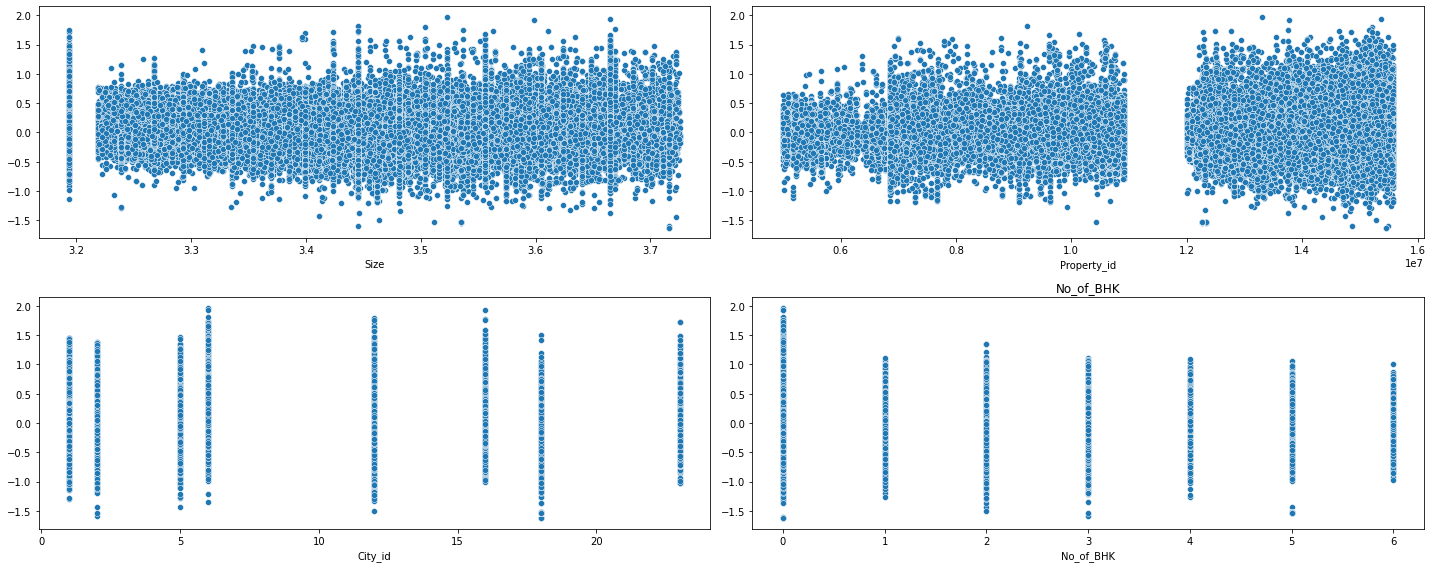

In [181]:
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20,8))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(x_train.columns[1:5], ax.flatten()):
    sns.scatterplot(x_train[variable],slr_model.resid , ax=subplot,palette='Spectral')
    plt.title(variable)
    plt.tight_layout()

# display the plot
plt.show()

📝**Interpretation:**

* The above plots show no specific pattern, implies that there is a linearity present in the data.

In [79]:
ndf=m_df.select_dtypes(include=np.number)

## Feature Selection:

### Variance Inflation Factor (VIF)

The Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity between the features. The value of VIF equal to 1 indicates that no features are correlated. We calculate VIF of the numerical independent variables.   

Steps to calculate VIF:<br>
1. Regress one independent variable (say V<sub>i</sub>) on all the remaining independent variables (say V<sub>j</sub>, j ≠ i)
2. Calculate R-squared of the regression model
3. Calculate VIF for the variable V<sub>i</sub> using the formula:
<p style='text-indent:29em'> <strong> VIF = 1 / (1 - R-squared)</strong>  </p><br>
4. Repeate the steps 1 to 3 to calculate VIF of each independent variable

In [80]:
for ind in range(len(ndf.columns)):
    vif=pd.DataFrame()
    vif['Vif_f']=[ variance_inflation_factor(ndf.values,i) for i in range(len(ndf.columns))]
    vif['Features']=ndf.columns
    multi=vif[vif['Vif_f'] > 5]
    if (multi.empty==False):
        df_sorted=multi.sort_values(by='Vif_f',ascending=False)
    else:
        print(vif)
        break
    if (df_sorted.empty==False):
        ndf=ndf.drop(df_sorted.Features.iloc[0],axis=1)
    else:
        print(vif)

       Vif_f                             Features
0   0.890197                          Property_id
1   4.003648                              City_id
2   1.228903      Property_type_Independent House
3   1.181213                  Property_type_Villa
4   3.447002   Property_status_Under Construction
5   1.001591    Property_building_status_INACTIVE
6   3.465124  Property_building_status_UNVERIFIED
7   1.554237          is_furnished_Semi-Furnished
8   3.673840              is_RERA_registered_True
9   1.004731                   is_PentaHouse_True
10  1.767106                      No_of_BHK_1 BHK
11  2.581715                      No_of_BHK_2 BHK
12  2.284904                      No_of_BHK_3 BHK
13  1.458255                      No_of_BHK_4 BHK
14  1.230651                     No_of_BHK_>4 BHK
15  1.045657                        No_of_BHK_RKs
16  1.035751                      Posted_on_Hours
17  1.000873                    Posted_on_Minutes
18  3.053758                     Posted_on_Months


In [81]:
# After VIF, Model Buliding with Significiant Features.

x_train, x_test, y_train, y_test=train_test_split(ndf,m_df['Price'],random_state=1,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(232464, 20)
(99628, 20)
(232464,)
(99628,)


In [82]:
# add the intercept 
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

### Model Evaluation

In [83]:
# building a model on the train dataset with an intercept
# fit() is used to fit the OLS model
mlr_model=sm.OLS(y_train,x_train).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                 1.492e+04
Date:                Thu, 18 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:57:17   Log-Likelihood:            -1.1333e+05
No. Observations:              232464   AIC:                         2.267e+05
Df Residuals:                  232443   BIC:                         2.269e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

📝Interpretation:

* The `R-squared` value obtained from this model is 0.56 which means that the above model explains 56% of the variation in the `Price`. 


* The `Durbin-Watson` test is used to check the autocorrelation between the residuals.
  The summary output shows that the Durbin-Watson test statistic is near to 2: which means there is no `autocorrelation`.
        
        
* The `Jarque-Bera` test is used to check the normality of the residuals. Here, the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.


* The `Cond. No` represents the `Condition Number (CN)` which is used to check the multicollinearity.

  If CN < 100: no multicollinearity<br>
  If CN is between 100 and 1000: moderate multicollinearity<br>
  If CN > 1000: severe multicollinearity

  Thus, it can be seen that there is `multicollinearity` in the data, but slightly decrease after `VIF`.

---

##### Predict the `Price` using X_test_full

In [84]:
# Predict

y_train_pred=mlr_model.predict(x_train)
y_test_pred=mlr_model.predict(x_test)

### Q-Q Plot

* Q-Q plot is s visualization technique to check the normality of the residuals. It plots the quantiles of observed data versus the quantiles of the standard normal distribution.

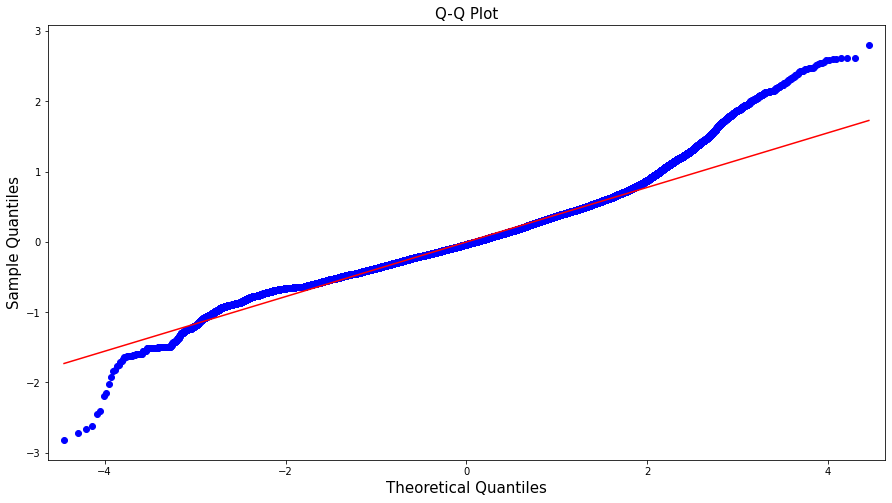

In [85]:
plt.rcParams['figure.figsize'] = [15,8]

# plot the Q-Q plot
# 'r' represents the regression line
qqplot(mlr_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show() 

📝**Interpretation:**

The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are close to the diagonal line, we conclude that the residuals do not follow a `normal distribution`.

### Create a generalized function to create a dataframe containing the scores from all the models

In [86]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model):
    
    # score() returns the R-squared value
    r_sq = model.score(x_train, y_train)
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = x_train.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = x_train.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq, r_sq_adj])

In [87]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    # assign 'score_card' as global variable
    global score_card

    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE':np.mean(np.abs((y_test-y_test_pred)/y_test)*100), 
                       'Test_RMSE': rmse(y_test, y_test_pred), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

### Model Performance

In [88]:
mse_train=mean_squared_error(y_train,y_train_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error (MSE) on training set: ", mse_train)
print("Mean Squared Error (MSE) on testing set: ", mse_test)
print('--'*33)
print("Root mean Squared Error (RMSE) on training set: ", np.sqrt(mse_train))
print("Root mean Squared Error (RMSE) on testing set: ", np.sqrt(mse_test))

Mean Squared Error (MSE) on training set:  0.15523003225712112
Mean Squared Error (MSE) on testing set:  0.1556647874028027
------------------------------------------------------------------
Root mean Squared Error (RMSE) on training set:  0.39399242664944856
Root mean Squared Error (RMSE) on testing set:  0.3945437712127803


#### Build a MLR model on a training dataset.

In [89]:
Linereg=LinearRegression()
Linereg.fit(x_train,y_train)

LinearRegression()

In [90]:
# Predict

y_train_pred=Linereg.predict(x_train)
y_test_pred=Linereg.predict(x_test)

In [91]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression', model = Linereg)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.562121,0.562081,0.394544,2.764135


In [92]:
matrix = pd.Series({'Model_Name': "MLR Full Model",
                     'Alpha (Wherever Required)':'-',
                     'l1-ratio':'-',
                     'R-Squared': mlr_model.rsquared,
                     'Adj. R-Squared': mlr_model.rsquared_adj,
                     'Test_RMSE': rmse(y_test, y_test_pred),
                     'Test_MAPE':np.mean(np.abs((y_test-y_test_pred)/y_test)*100)
                   })
score_card = score_card.append(matrix, ignore_index = True)

# print the result table
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.562121,0.562081,0.394544,2.764135
1,MLR Full Model,-,-,0.562121,0.562083,0.394544,2.764135


### Model Performance

In [93]:
mse_train=mean_squared_error(y_train,y_train_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
print("Mean Squared Error (MSE) on training set: ", mse_train)
print("Mean Squared Error (MSE) on testing set: ", mse_test)
print('--'*33)
print("Root mean Squared Error (RMSE) on training set: ", np.sqrt(mse_train))
print("Root mean Squared Error (RMSE) on testing set: ", np.sqrt(mse_test))

Mean Squared Error (MSE) on training set:  0.15523003225712123
Mean Squared Error (MSE) on testing set:  0.15566478740280237
------------------------------------------------------------------
Root mean Squared Error (RMSE) on training set:  0.3939924266494487
Root mean Squared Error (RMSE) on testing set:  0.39454377121277984


📝**Interpretation:**

`RMSE` on the training set is `0.39`, while on the test set it is `0.39`. We can see that there is no large difference in the `RMSE` of the train and the test set. This implies that our model has `well-fitted` on the train set.

### Stepwise Regression

All the variables in the dataset may not have a significant effect on the target variable.

#### Forward Selection
This method considers the null model (model with no predictors) in the first step. In the next steps start adding one variable at each step until we run out of the independent variables or the stopping rule is achieved.

The variable is added based on its correlation with the target variable. Such a variable has the least p-value in the model.

In [94]:
# Bulid Linear Regression Model.

linereg=LinearRegression()

In [95]:
# Forward Selection.

forward=sfs(estimator=linereg,k_features='best',forward=True,scoring='r2',cv=5)
forward.fit(x_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features='best',
                          scoring='r2')

In [96]:
print('Features selected using forward selection are: ')
print('--'*30)
print(forward.k_feature_names_)
print('--'*15)
print('R-Squared:',forward.k_score_)

Features selected using forward selection are: 
------------------------------------------------------------
('Property_id', 'City_id', 'Property_type_Independent House', 'Property_status_Under Construction', 'Property_building_status_INACTIVE', 'Property_building_status_UNVERIFIED', 'is_furnished_Semi-Furnished', 'is_RERA_registered_True', 'is_PentaHouse_True', 'No_of_BHK_1 BHK', 'No_of_BHK_2 BHK', 'No_of_BHK_3 BHK', 'No_of_BHK_4 BHK', 'No_of_BHK_>4 BHK', 'No_of_BHK_RKs', 'Posted_on_Hours', 'Posted_on_Minutes', 'Posted_on_Months', 'Posted_on_Years')
------------------------------
R-Squared: 0.5620291821153958


📝Interpretation:

* The `R-squared` value obtained from this model is 0.57 which means that the above model explains 57% of the variation in the `Price` and it slightly increase after considering `significant` features. 

#### Recursive Feature Elimination (RFE)

* It is the process that returns the significant features in the dataset by recursively removing the less significant feature subsets.

In [110]:
# RFE
rfe_model=RFE(estimator=linereg)
rfe_model.fit(x_train,y_train)
print('R-squared value:',rfe_model.score(x_train,y_train))

R-squared value: 0.5493593178809058


* The `R-squared` value obtained from this model is 0.54 which means that the above model explains 54% of the variation in the `Price` and it slightly `decreases` after considering `Ranking` features. 

In [107]:
# Dataframe for Recursive
dataframe=pd.DataFrame(data=rfe_model.ranking_,index=x_train.columns,columns=['Ranking'])
dataframe[dataframe['Ranking']==1]

,Ranking
Property_building_status_INACTIVE,1
Property_building_status_UNVERIFIED,1
is_PentaHouse_True,1
No_of_BHK_1 BHK,1
No_of_BHK_2 BHK,1
No_of_BHK_3 BHK,1
No_of_BHK_4 BHK,1
No_of_BHK_>4 BHK,1
No_of_BHK_RKs,1
Posted_on_Minutes,1


## Cross Validation

### K-Fold Cross Validation using `cross_val_score()`:
`K-Fold` cross validation is where a given dataset is divided into `K folds` where at some stage each fold is used as a test set.

`cross_val_score()` also does the stratified sampling internally if required.

In [111]:
# K-Fold

k_fold_score=cross_val_score(estimator=linereg,X=x_train,y=y_train,scoring='r2')
print("Average score obtained: ", round(np.mean(k_fold_score), 4))

Average score obtained:  0.562


#### Leave One Out Cross Validation (LOOCV)
It is a process in which the model is trained on the training dataset, with the exception of only one data point, which is used to test the model. This method increases the variance, as only one data point is used for testing. LOOCV can be time consuming as k is equal to the number of observations.

In LOOCV, the estimates from each fold are highly correlated and their average can have a high level of variance


## Gradient Descent


### Stochastic Gradient Descent

The gradient descent method considers all the data points to calculate the values of the parameters at each step. For a very large dataset, this method becomes computationally expensive. To avoid this problem, we use Stochastic Gradient Descent (SGD) which considers a single data point (sample) to perform each iteration. Each sample is randomly selected for performing the iteration.

####  Build MLR model using SGD method.

In [113]:
sgd_model=SGDRegressor()
sgd_model.fit(x_train,y_train)

SGDRegressor()

In [114]:
# Predict
y_pred_tr=sgd_model.predict(x_train)
y_pred_te=sgd_model.predict(x_test)

### Model Performance

In [115]:
mse_train=mean_squared_error(y_train,y_pred_tr)
mse_test=mean_squared_error(y_test,y_pred_te)
print("Mean Squared Error (MSE) on training set: ", mse_train)
print("Mean Squared Error (MSE) on testing set: ", mse_test)
print('--'*33)
print("Root mean Squared Error (RMSE) on training set: ", np.sqrt(mse_train))
print("Root mean Squared Error (RMSE) on testing set: ", np.sqrt(mse_test))

Mean Squared Error (MSE) on training set:  1.0265064192404752e+43
Mean Squared Error (MSE) on testing set:  1.0260038635556543e+43
------------------------------------------------------------------
Root mean Squared Error (RMSE) on training set:  3.2039138865463836e+21
Root mean Squared Error (RMSE) on testing set:  3.203129506522729e+21


📝**Interpretation:**

`RMSE` on the training set is `1.026`, while on the test set it is `1.026`. We can see that there is no large difference in the `RMSE` of the train and the test set. This implies that our model has `well-fitted` on the train set.

#### Visualize the change in values of coefficients obtained from `slr_model ` and `sgd_model`.

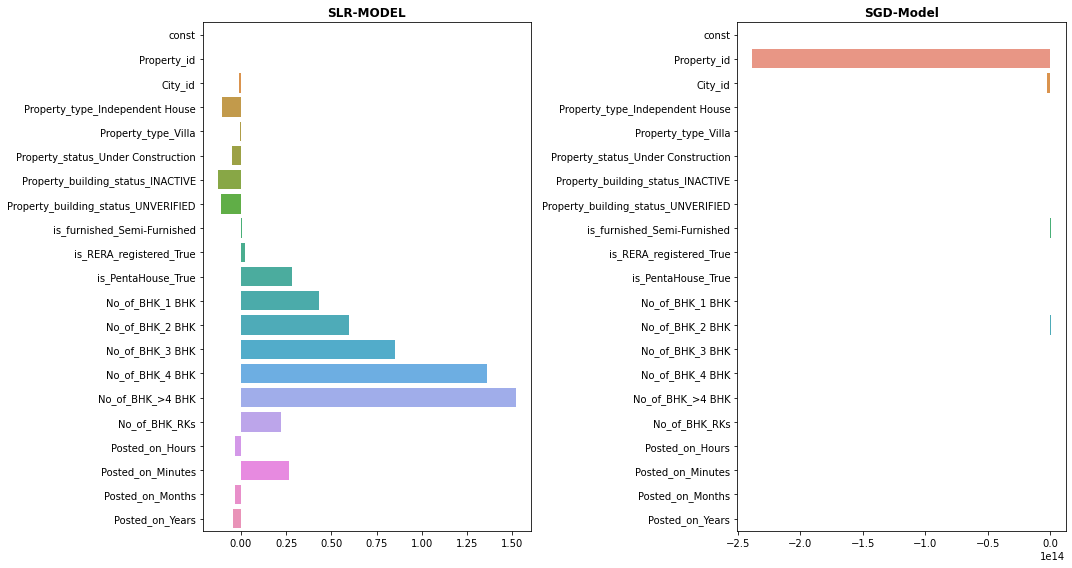

In [116]:
plt.subplot(1,2,1)
sns.barplot(x=Linereg.coef_,y=x_train.columns)
plt.title('SLR-MODEL',weight='bold')
plt.subplot(1,2,2)
sns.barplot(x=sgd_model.coef_,y=x_train.columns)
plt.title('SGD-Model',weight='bold')
plt.tight_layout()

📝Interpretation:

* The coefficients obtained from SGD have smaller values as compared to the coefficients obtained from linear regression using OLS.

## Regularization

One way to deal with the overfitting problem is by adding the `Regularization` to the model. It is observed that inflation of the coefficients cause overfitting. To prevent overfitting, it is important to regulate the coefficients by penalizing possible coefficient inflations. Regularization imposes penalties on parameters if they inflate to large values to prevent them from being weighted too heavily. In this section, we will learn about the three regularization techniques:

1. Ridge Regression
2. Lasso Regression
3. Elastic Net Regression

### Ridge Regression

Most of the times our data can show multicollinearity in the variables. To analyze such data we can use `Ridge Regression`. It uses the L2 norm for regularization. 

#### Build regression model using Ridge Regression.

In [120]:
for i in range(1,26,2):
    ridge=Ridge(alpha=i,max_iter=2000)
    r_model=ridge.fit(x_train,y_train)
    y_pred=r_model.predict(x_test)
    print('RMSE for alpha {}'.format(i),rmse(y_test,y_pred))

RMSE for alpha 1 0.39454368749997853
RMSE for alpha 3 0.39454371033257085
RMSE for alpha 5 0.39454395875931536
RMSE for alpha 7 0.39454440474069685
RMSE for alpha 9 0.39454502543211417
RMSE for alpha 11 0.3945458020872148
RMSE for alpha 13 0.3945467192214412
RMSE for alpha 15 0.39454776396736346
RMSE for alpha 17 0.3945489255730353
RMSE for alpha 19 0.39455019500817706
RMSE for alpha 21 0.3945515646524675
RMSE for alpha 23 0.394553028046952
RMSE for alpha 25 0.39455457969438845


**Interpretation:**
    
After applying the ridge regression with multiple alpha , the best RMSE value given by `alpha=1` decreased to `0.39`.

In [121]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Ridge Model-2', model = r_model,alpha=7)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.562121,0.562081,0.394544,2.764135
1,MLR Full Model,-,-,0.562121,0.562083,0.394544,2.764135
2,Ridge Model-2,7,-,0.562099,0.562060,0.394544,2.764135


In [122]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Ridge Model', model = r_model,alpha=4)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.562121,0.562081,0.394544,2.764135
1,MLR Full Model,-,-,0.562121,0.562083,0.394544,2.764135
2,Ridge Model-2,7,-,0.562099,0.562060,0.394544,2.764135
3,Ridge Model,4,-,0.562099,0.562060,0.394544,2.764135


In [123]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Ridge Model-3', model = r_model,alpha=10)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.562121,0.562081,0.394544,2.764135
1,MLR Full Model,-,-,0.562121,0.562083,0.394544,2.764135
2,Ridge Model-2,7,-,0.562099,0.562060,0.394544,2.764135
3,Ridge Model,4,-,0.562099,0.562060,0.394544,2.764135
4,Ridge Model-3,10,-,0.562099,0.562060,0.394544,2.764135


In [124]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Ridge Model-4', model = r_model,alpha=15)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.562121,0.562081,0.394544,2.764135
1,MLR Full Model,-,-,0.562121,0.562083,0.394544,2.764135
2,Ridge Model-2,7,-,0.562099,0.562060,0.394544,2.764135
3,Ridge Model,4,-,0.562099,0.562060,0.394544,2.764135
4,Ridge Model-3,10,-,0.562099,0.562060,0.394544,2.764135
5,Ridge Model-4,15,-,0.562099,0.562060,0.394544,2.764135


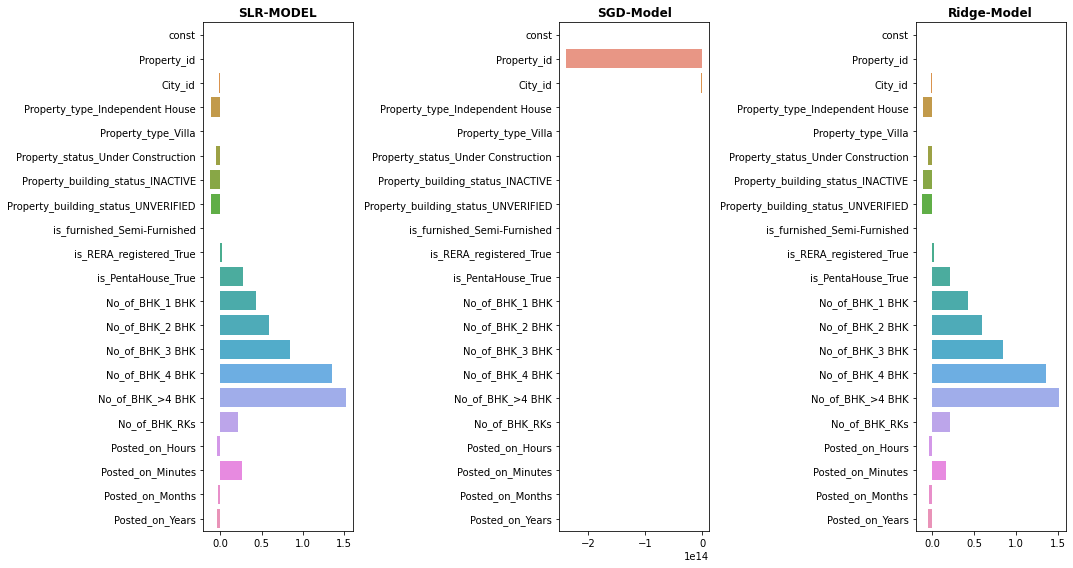

In [125]:
plt.subplot(1,3,1)
sns.barplot(x=Linereg.coef_,y=x_train.columns)
plt.title('SLR-MODEL',weight='bold')
plt.subplot(1,3,2)
sns.barplot(x=sgd_model.coef_,y=x_train.columns)
plt.title('SGD-Model',weight='bold')
plt.subplot(1,3,3)
sns.barplot(x=r_model.coef_,y=x_train.columns)
plt.title('Ridge-Model',weight='bold')
plt.tight_layout()

### Lasso Regression

Lasso regression shrinks the less important variable's coefficient to zero which makes this technique more useful when we are dealing with large number of variables. It is a type of regularization technique that uses L1 norm for regularization. 

In [126]:
for i in range(1,16,2):
    lasso=Lasso(alpha=i)
    l_model=lasso.fit(x_train,y_train)
    y_pred_t=l_model.predict(x_test)
    y_pred_tr=l_model.predict(x_train)
    print('--'*10)
    print('RMSE for alpha {} for training set'.format(i),rmse(y_train,y_pred_tr))
    print('RMSE for alpha {} for testing set'.format(i),rmse(y_test,y_pred_t))

--------------------
RMSE for alpha 1 for training set 0.5865229105140619
RMSE for alpha 1 for testing set 0.5869524910945673
--------------------
RMSE for alpha 3 for training set 0.5925997462805409
RMSE for alpha 3 for testing set 0.5929315839524737
--------------------
RMSE for alpha 5 for training set 0.5925997462826402
RMSE for alpha 5 for testing set 0.5929315817770745
--------------------
RMSE for alpha 7 for training set 0.5925997462857894
RMSE for alpha 7 for testing set 0.5929315796027188
--------------------
RMSE for alpha 9 for training set 0.592599746289988
RMSE for alpha 9 for testing set 0.5929315774294067
--------------------
RMSE for alpha 11 for training set 0.5925997462952366
RMSE for alpha 11 for testing set 0.5929315752571381
--------------------
RMSE for alpha 13 for training set 0.5925997463015349
RMSE for alpha 13 for testing set 0.5929315730859132
--------------------
RMSE for alpha 15 for training set 0.5925997463088827
RMSE for alpha 15 for testing set 0.5929

**Interpretation:**
    
After applying the `Lasso` regression with multiple alpha , the best RMSE value given by `alpha=3`.

In [127]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso Model', model = l_model,alpha=3)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.562121,0.562081,0.394544,2.764135
1,MLR Full Model,-,-,0.562121,0.562083,0.394544,2.764135
2,Ridge Model-2,7,-,0.562099,0.562060,0.394544,2.764135
3,Ridge Model,4,-,0.562099,0.562060,0.394544,2.764135
4,Ridge Model-3,10,-,0.562099,0.562060,0.394544,2.764135
5,Ridge Model-4,15,-,0.562099,0.562060,0.394544,2.764135
6,Lasso Model,3,-,0.009392,0.009303,0.394544,2.764135


In [128]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso Model-2', model = l_model,alpha=7)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.562121,0.562081,0.394544,2.764135
1,MLR Full Model,-,-,0.562121,0.562083,0.394544,2.764135
2,Ridge Model-2,7,-,0.562099,0.562060,0.394544,2.764135
3,Ridge Model,4,-,0.562099,0.562060,0.394544,2.764135
4,Ridge Model-3,10,-,0.562099,0.562060,0.394544,2.764135
5,Ridge Model-4,15,-,0.562099,0.562060,0.394544,2.764135
6,Lasso Model,3,-,0.009392,0.009303,0.394544,2.764135
7,Lasso Model-2,7,-,0.009392,0.009303,0.394544,2.764135


In [129]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso Model-3', model = l_model,alpha=11)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.562121,0.562081,0.394544,2.764135
1,MLR Full Model,-,-,0.562121,0.562083,0.394544,2.764135
2,Ridge Model-2,7,-,0.562099,0.562060,0.394544,2.764135
3,Ridge Model,4,-,0.562099,0.562060,0.394544,2.764135
4,Ridge Model-3,10,-,0.562099,0.562060,0.394544,2.764135
5,Ridge Model-4,15,-,0.562099,0.562060,0.394544,2.764135
6,Lasso Model,3,-,0.009392,0.009303,0.394544,2.764135
7,Lasso Model-2,7,-,0.009392,0.009303,0.394544,2.764135
8,Lasso Model-3,11,-,0.009392,0.009303,0.394544,2.764135


In [130]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso Model-4', model = l_model,alpha=15)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.562121,0.562081,0.394544,2.764135
1,MLR Full Model,-,-,0.562121,0.562083,0.394544,2.764135
2,Ridge Model-2,7,-,0.562099,0.562060,0.394544,2.764135
3,Ridge Model,4,-,0.562099,0.562060,0.394544,2.764135
4,Ridge Model-3,10,-,0.562099,0.562060,0.394544,2.764135
5,Ridge Model-4,15,-,0.562099,0.562060,0.394544,2.764135
6,Lasso Model,3,-,0.009392,0.009303,0.394544,2.764135
7,Lasso Model-2,7,-,0.009392,0.009303,0.394544,2.764135
8,Lasso Model-3,11,-,0.009392,0.009303,0.394544,2.764135
9,Lasso Model-4,15,-,0.009392,0.009303,0.394544,2.764135


In [131]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso Model-5', model = l_model,alpha=20)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.562121,0.562081,0.394544,2.764135
1,MLR Full Model,-,-,0.562121,0.562083,0.394544,2.764135
2,Ridge Model-2,7,-,0.562099,0.562060,0.394544,2.764135
3,Ridge Model,4,-,0.562099,0.562060,0.394544,2.764135
4,Ridge Model-3,10,-,0.562099,0.562060,0.394544,2.764135
5,Ridge Model-4,15,-,0.562099,0.562060,0.394544,2.764135
6,Lasso Model,3,-,0.009392,0.009303,0.394544,2.764135
7,Lasso Model-2,7,-,0.009392,0.009303,0.394544,2.764135
8,Lasso Model-3,11,-,0.009392,0.009303,0.394544,2.764135
9,Lasso Model-4,15,-,0.009392,0.009303,0.394544,2.764135


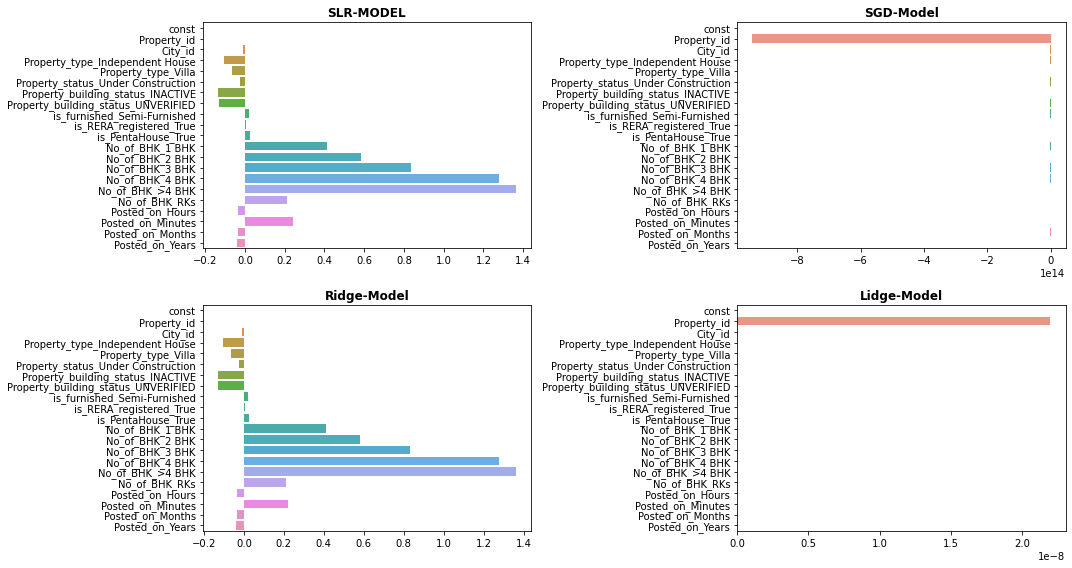

In [157]:
# Visualize
plt.subplot(2,2,1)
sns.barplot(x=Linereg.coef_,y=x_train.columns)
plt.title('SLR-MODEL',weight='bold')
plt.subplot(2,2,2)
sns.barplot(x=sgd_model.coef_,y=x_train.columns)
plt.title('SGD-Model',weight='bold')
plt.subplot(2,2,3)
sns.barplot(x=r_model.coef_,y=x_train.columns)
plt.title('Ridge-Model',weight='bold')
plt.subplot(2,2,4)
sns.barplot(x=l_model.coef_,y=x_train.columns)
plt.title('Lidge-Model',weight='bold')
plt.tight_layout()

## GridSearchCV

Hyperparameters are the parameters in the model that are preset by the user. GridSearch considers all the combinations of hyperparameters and returns the best hyperparameter values. Following are some of the parameters that GridSearchCV takes:

1. estimator: pass the machine learning algorithm model
2. param_grid: takes a dictionary having parameter names as keys and list of parameters as values
3. cv: number of folds for k-fold cross validation

### Find optimal value of alpha for `Elastic Net Regression`

In [132]:
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

#### Elastic Net Regression

This technique is a combination of Rigde and Lasso reression techniques. It considers the linear combination of penalties for L1 and L2 regularization.

In [133]:
# initiate the elastic net regression model  
enet1 = ElasticNet()
enet1.fit(x_train,y_train)

ElasticNet()

In [134]:
# initiate the elastic net regression model  
enet = ElasticNet()

In [135]:
grid_model=GridSearchCV(estimator=enet,param_grid=tuned_paramaters,cv=5)
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40,
                                    60],
                          'l1_ratio': [0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}])

In [136]:
# get the best parameters
print('Best parameters for Elastic Net Regression: ', grid_model.best_params_, '\n')

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.0001} 



In [137]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'GridSearchCV (ElasticNet)', model = grid_model,alpha=0.0001,l1_ratio=0.0001)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.562121,0.562081,0.394544,2.764135
1,MLR Full Model,-,-,0.562121,0.562083,0.394544,2.764135
2,Ridge Model-2,7,-,0.562099,0.562060,0.394544,2.764135
3,Ridge Model,4,-,0.562099,0.562060,0.394544,2.764135
4,Ridge Model-3,10,-,0.562099,0.562060,0.394544,2.764135
5,Ridge Model-4,15,-,0.562099,0.562060,0.394544,2.764135
6,Lasso Model,3,-,0.009392,0.009303,0.394544,2.764135
7,Lasso Model-2,7,-,0.009392,0.009303,0.394544,2.764135
8,Lasso Model-3,11,-,0.009392,0.009303,0.394544,2.764135
9,Lasso Model-4,15,-,0.009392,0.009303,0.394544,2.764135


In [138]:
# Predict

y_pred_tr=grid_model.predict(x_train)
y_pred_te=grid_model.predict(x_test)

### Model Performance

In [139]:
mse_train=mean_squared_error(y_train,y_pred_tr)
mse_test=mean_squared_error(y_test,y_pred_te)
print("Mean Squared Error (MSE) on training set: ", mse_train)
print("Mean Squared Error (MSE) on testing set: ", mse_test)
print('--'*33)
print("Root mean Squared Error (RMSE) on training set: ", np.sqrt(mse_train))
print("Root mean Squared Error (RMSE) on testing set: ", np.sqrt(mse_test))

Mean Squared Error (MSE) on training set:  0.15523677367079003
Mean Squared Error (MSE) on testing set:  0.15567224032792742
------------------------------------------------------------------
Root mean Squared Error (RMSE) on training set:  0.3940009818145001
Root mean Squared Error (RMSE) on testing set:  0.3945532160912231


In [140]:
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],'max_iter':[500,600,700,1000]}]

In [142]:
# initiate the ridge regression model 
ridge_model=Ridge()
grid_model=GridSearchCV(estimator=ridge_model,param_grid=tuned_paramaters,cv=5)
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40,
                                    60],
                          'max_iter': [500, 600, 700, 1000]}])

In [143]:
# get the best parameters
print('Best parameters for Ridge Regression: ', grid_model.best_params_, '\n')

Best parameters for Ridge Regression:  {'alpha': 5, 'max_iter': 500} 



In [144]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'GridSearchCV (Ridge)', model = grid_model,alpha=5)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.562121,0.562081,0.394544,2.764135
1,MLR Full Model,-,-,0.562121,0.562083,0.394544,2.764135
2,Ridge Model-2,7,-,0.562099,0.562060,0.394544,2.764135
3,Ridge Model,4,-,0.562099,0.562060,0.394544,2.764135
4,Ridge Model-3,10,-,0.562099,0.562060,0.394544,2.764135
5,Ridge Model-4,15,-,0.562099,0.562060,0.394544,2.764135
6,Lasso Model,3,-,0.009392,0.009303,0.394544,2.764135
7,Lasso Model-2,7,-,0.009392,0.009303,0.394544,2.764135
8,Lasso Model-3,11,-,0.009392,0.009303,0.394544,2.764135
9,Lasso Model-4,15,-,0.009392,0.009303,0.394544,2.764135


In [145]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'GridSearchCV (Ridge)-2', model = grid_model,alpha=7)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.562121,0.562081,0.394544,2.764135
1,MLR Full Model,-,-,0.562121,0.562083,0.394544,2.764135
2,Ridge Model-2,7,-,0.562099,0.562060,0.394544,2.764135
3,Ridge Model,4,-,0.562099,0.562060,0.394544,2.764135
4,Ridge Model-3,10,-,0.562099,0.562060,0.394544,2.764135
5,Ridge Model-4,15,-,0.562099,0.562060,0.394544,2.764135
6,Lasso Model,3,-,0.009392,0.009303,0.394544,2.764135
7,Lasso Model-2,7,-,0.009392,0.009303,0.394544,2.764135
8,Lasso Model-3,11,-,0.009392,0.009303,0.394544,2.764135
9,Lasso Model-4,15,-,0.009392,0.009303,0.394544,2.764135


In [146]:
# initiate the lasso regression model 
lasso_model=Ridge()
grid_model=GridSearchCV(estimator=lasso_model,param_grid=tuned_paramaters,cv=5)
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40,
                                    60],
                          'max_iter': [500, 600, 700, 1000]}])

In [148]:
# get the best parameters
print('Best parameters for Lasso Regression: ', grid_model.best_params_, '\n')

Best parameters for Lasso Regression:  {'alpha': 5, 'max_iter': 500} 



In [149]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'GridSearchCV (Lasso)', model = grid_model,alpha=5)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.562121,0.562081,0.394544,2.764135
1,MLR Full Model,-,-,0.562121,0.562083,0.394544,2.764135
2,Ridge Model-2,7,-,0.562099,0.562060,0.394544,2.764135
3,Ridge Model,4,-,0.562099,0.562060,0.394544,2.764135
4,Ridge Model-3,10,-,0.562099,0.562060,0.394544,2.764135
5,Ridge Model-4,15,-,0.562099,0.562060,0.394544,2.764135
6,Lasso Model,3,-,0.009392,0.009303,0.394544,2.764135
7,Lasso Model-2,7,-,0.009392,0.009303,0.394544,2.764135
8,Lasso Model-3,11,-,0.009392,0.009303,0.394544,2.764135
9,Lasso Model-4,15,-,0.009392,0.009303,0.394544,2.764135


In [150]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'GridSearchCV (Lasso)-2', model = grid_model,alpha=9)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.562121,0.562081,0.394544,2.764135
1,MLR Full Model,-,-,0.562121,0.562083,0.394544,2.764135
2,Ridge Model-2,7,-,0.562099,0.562060,0.394544,2.764135
3,Ridge Model,4,-,0.562099,0.562060,0.394544,2.764135
4,Ridge Model-3,10,-,0.562099,0.562060,0.394544,2.764135
5,Ridge Model-4,15,-,0.562099,0.562060,0.394544,2.764135
6,Lasso Model,3,-,0.009392,0.009303,0.394544,2.764135
7,Lasso Model-2,7,-,0.009392,0.009303,0.394544,2.764135
8,Lasso Model-3,11,-,0.009392,0.009303,0.394544,2.764135
9,Lasso Model-4,15,-,0.009392,0.009303,0.394544,2.764135


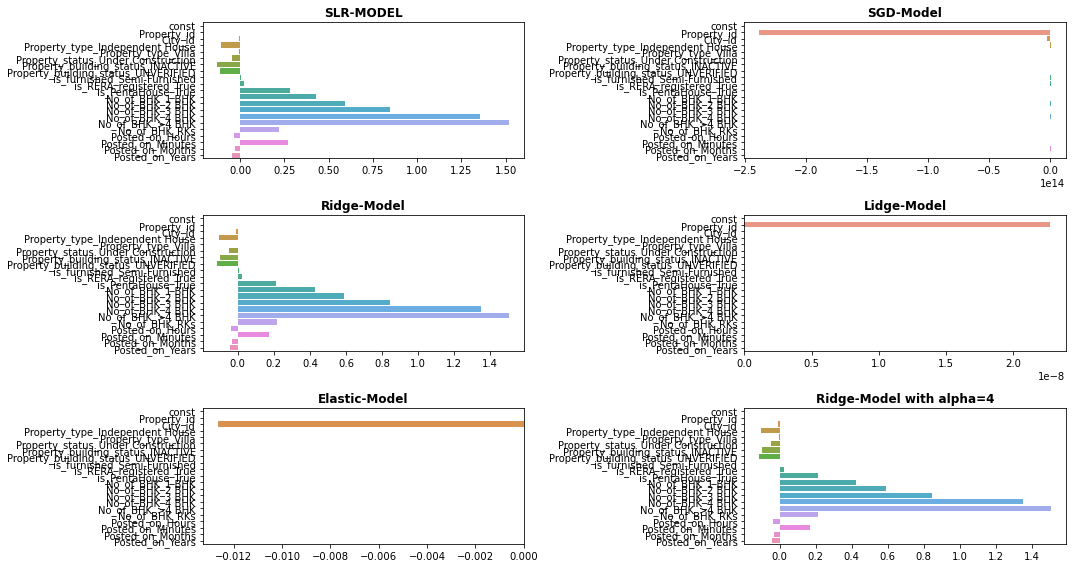

In [151]:
# Visualize
plt.subplot(3,2,1)
sns.barplot(x=Linereg.coef_,y=x_train.columns)
plt.title('SLR-MODEL',weight='bold')
plt.subplot(3,2,2)
sns.barplot(x=sgd_model.coef_,y=x_train.columns)
plt.title('SGD-Model',weight='bold')
plt.subplot(3,2,3)
sns.barplot(x=r_model.coef_,y=x_train.columns)
plt.title('Ridge-Model',weight='bold')
plt.subplot(3,2,4)
sns.barplot(x=l_model.coef_,y=x_train.columns)
plt.title('Lidge-Model',weight='bold')
plt.subplot(3,2,5)
sns.barplot(x=enet1.coef_,y=x_train.columns)
plt.title('Elastic-Model',weight='bold')
plt.subplot(3,2,6)
sns.barplot(x=r_model.coef_,y=x_train.columns)
plt.title('Ridge-Model with alpha=4',weight='bold')
plt.tight_layout()

In [152]:
# Dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.562121,0.562081,0.394544,2.764135
1,MLR Full Model,-,-,0.562121,0.562083,0.394544,2.764135
2,Ridge Model-2,7,-,0.562099,0.562060,0.394544,2.764135
3,Ridge Model,4,-,0.562099,0.562060,0.394544,2.764135
4,Ridge Model-3,10,-,0.562099,0.562060,0.394544,2.764135
5,Ridge Model-4,15,-,0.562099,0.562060,0.394544,2.764135
6,Lasso Model,3,-,0.009392,0.009303,0.394544,2.764135
7,Lasso Model-2,7,-,0.009392,0.009303,0.394544,2.764135
8,Lasso Model-3,11,-,0.009392,0.009303,0.394544,2.764135
9,Lasso Model-4,15,-,0.009392,0.009303,0.394544,2.764135


📝**Interpretation:**

We can see that `Regression Model` has the lowest test RMSE. Here, ridge regression with `alpha = 4` seems to deal with the problem of `overfitting` efficiently.